In [16]:
import pandas as pd
from fastai.vision.all import *

learn = load_learner("model/resnet50_mae/model.pkl")

In [17]:
df = pd.read_csv("data/bodyfat_dataset.csv")

In [18]:
df = df.drop(index=176)

df.to_csv("data/bodyfat_dataset.csv", index=False)

In [19]:
def create_regression_csv(df, output_csv="data/image_labels.csv", label_col="meanPrediction", image_prefix="image_", output_dir="images"):
    # Ensure column names are stripped of whitespace
    df.columns = df.columns.str.strip()
    
    image_cols = [col for col in df.columns if col.startswith(image_prefix)]
    records = []

    for idx, row in df.iterrows():
        label = row[label_col]
        for col in image_cols:
            url = row.get(col)
            if isinstance(url, str) and url.startswith("http"):
                ext = url.split('.')[-1].split('?')[0].lower()
                ext = ext if ext in ['jpg', 'jpeg', 'png', 'webp'] else 'jpg'
                filename = f"{idx}_{col}.{ext}"
                records.append({"filename": filename, "target": label})
    
    df_out = pd.DataFrame(records)
    df_out.to_csv(output_csv, index=False)
    print(f"Created {output_csv} with {len(df_out)} labeled images")
    return df_out

In [20]:
create_regression_csv(df)

Created data/image_labels.csv with 1588 labeled images


,filename,target
0,0_image_1.jpg,8.0
1,0_image_2.jpg,8.0
2,0_image_3.jpg,8.0
3,0_image_4.jpg,8.0
4,1_image_1.jpg,9.8
...,...,...
1583,796_image_1.jpg,12.0
1584,797_image_1.jpg,10.5
1585,798_image_1.jpg,15.0
1586,799_image_1.jpg,12.0


In [21]:
from fastai.vision.all import PILImage, show_image
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
df = pd.read_csv('data/image_labels.csv')
df

,filename,target
0,0_image_1.jpg,8.0
1,0_image_2.jpg,8.0
2,0_image_3.jpg,8.0
3,0_image_4.jpg,8.0
4,1_image_1.jpg,9.8
...,...,...
1583,796_image_1.jpg,12.0
1584,797_image_1.jpg,10.5
1585,798_image_1.jpg,15.0
1586,799_image_1.jpg,12.0


Processing images:   0%|                                                                                       | 0/1588 [00:00<?, ?it/s]

Processing images:   0%|                                                                      | 0/1588 [00:00<?, ?it/s, last_error=5.38]

Skipping 0_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/0_image_2.jpg'
Skipping 0_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/0_image_3.jpg'


Processing images:   0%|▏                                                             | 4/1588 [00:00<00:56, 28.06it/s, last_error=5.32]

Processing images:   0%|▏                                                             | 4/1588 [00:00<00:56, 28.06it/s, last_error=3.25]

Skipping 2_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/2_image_1.jpg'


Processing images:   0%|▎                                                             | 7/1588 [00:00<00:54, 28.90it/s, last_error=9.72]

Processing images:   0%|▎                                                            | 7/1588 [00:00<00:54, 28.90it/s, last_error=11.42]

Processing images:   0%|▎                                                             | 7/1588 [00:00<00:54, 28.90it/s, last_error=4.44]

Skipping 4_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/4_image_2.jpg'
Skipping 4_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/4_image_3.jpg'
Skipping 5_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/5_image_1.png'


Processing images:   1%|▍                                                            | 13/1588 [00:00<00:41, 37.59it/s, last_error=2.19]

Skipping 7_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/7_image_1.jpg'
Skipping 7_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/7_image_2.jpg'
Skipping 7_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/7_image_3.jpg'
Skipping 7_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/7_image_4.jpg'
Skipping 8_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/8_image_1.jpg'


Processing images:   1%|▍                                                            | 13/1588 [00:00<00:41, 37.59it/s, last_error=2.29]

Processing images:   1%|▍                                                            | 13/1588 [00:00<00:41, 37.59it/s, last_error=1.38]

Processing images:   1%|▊                                                            | 21/1588 [00:00<00:32, 47.56it/s, last_error=0.42]

Processing images:   1%|▊                                                            | 21/1588 [00:00<00:32, 47.56it/s, last_error=0.40]

Processing images:   1%|▊                                                            | 21/1588 [00:00<00:32, 47.56it/s, last_error=3.05]

Processing images:   1%|▊                                                            | 21/1588 [00:00<00:32, 47.56it/s, last_error=7.78]

Processing images:   1%|▊                                                            | 21/1588 [00:00<00:32, 47.56it/s, last_error=8.20]

Processing images:   2%|▉                                                            | 26/1588 [00:00<00:42, 37.04it/s, last_error=7.57]

Processing images:   2%|▉                                                            | 26/1588 [00:00<00:42, 37.04it/s, last_error=7.63]

Skipping 13_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/13_image_1.jpeg'


Processing images:   2%|▉                                                            | 26/1588 [00:00<00:42, 37.04it/s, last_error=3.96]

Processing images:   2%|█▏                                                           | 30/1588 [00:00<00:43, 35.85it/s, last_error=3.63]

Processing images:   2%|█▏                                                           | 30/1588 [00:00<00:43, 35.85it/s, last_error=0.72]

Processing images:   2%|█▏                                                           | 30/1588 [00:00<00:43, 35.85it/s, last_error=1.25]

Skipping 16_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/16_image_2.jpg'


Processing images:   2%|█▎                                                           | 34/1588 [00:00<00:44, 34.98it/s, last_error=1.85]

Processing images:   2%|█▎                                                           | 34/1588 [00:00<00:44, 34.98it/s, last_error=1.60]

Processing images:   2%|█▎                                                           | 34/1588 [00:01<00:44, 34.98it/s, last_error=0.77]

Skipping 18_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/18_image_1.jpg'


Processing images:   2%|█▍                                                           | 38/1588 [00:01<00:47, 32.33it/s, last_error=3.51]

Processing images:   2%|█▍                                                           | 38/1588 [00:01<00:47, 32.33it/s, last_error=3.78]

Processing images:   3%|█▌                                                           | 42/1588 [00:01<00:51, 29.91it/s, last_error=1.55]

Skipping 20_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/20_image_1.jpg'
Skipping 20_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/20_image_2.jpg'


Processing images:   3%|█▌                                                           | 42/1588 [00:01<00:51, 29.91it/s, last_error=2.86]

Processing images:   3%|█▌                                                           | 42/1588 [00:01<00:51, 29.91it/s, last_error=2.21]

Processing images:   3%|█▌                                                           | 42/1588 [00:01<00:51, 29.91it/s, last_error=0.97]

Processing images:   3%|█▊                                                           | 46/1588 [00:01<00:54, 28.23it/s, last_error=2.03]

Processing images:   3%|█▊                                                           | 46/1588 [00:01<00:54, 28.23it/s, last_error=2.40]

Processing images:   3%|█▊                                                           | 46/1588 [00:01<00:54, 28.23it/s, last_error=2.56]

Processing images:   3%|█▉                                                           | 49/1588 [00:01<00:55, 27.64it/s, last_error=2.18]

Processing images:   3%|█▉                                                           | 49/1588 [00:01<00:55, 27.64it/s, last_error=2.12]

Processing images:   3%|█▉                                                           | 49/1588 [00:01<00:55, 27.64it/s, last_error=0.97]

Processing images:   3%|█▉                                                           | 52/1588 [00:01<00:56, 27.06it/s, last_error=1.40]

Processing images:   3%|█▉                                                           | 52/1588 [00:01<00:56, 27.06it/s, last_error=0.68]

Processing images:   3%|█▉                                                           | 52/1588 [00:01<00:56, 27.06it/s, last_error=0.03]

Processing images:   3%|██                                                           | 55/1588 [00:01<00:56, 27.13it/s, last_error=0.00]

Skipping 26_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/26_image_4.jpg'


Processing images:   3%|██                                                           | 55/1588 [00:01<00:56, 27.13it/s, last_error=0.79]

Processing images:   3%|██                                                           | 55/1588 [00:01<00:56, 27.13it/s, last_error=0.93]

Processing images:   4%|██▎                                                          | 59/1588 [00:01<00:52, 29.11it/s, last_error=4.60]

Processing images:   4%|██▎                                                          | 59/1588 [00:01<00:52, 29.11it/s, last_error=2.47]

Processing images:   4%|██▎                                                          | 59/1588 [00:01<00:52, 29.11it/s, last_error=2.17]

Processing images:   4%|██▍                                                          | 62/1588 [00:01<00:52, 28.88it/s, last_error=0.67]

Processing images:   4%|██▍                                                          | 62/1588 [00:02<00:52, 28.88it/s, last_error=0.54]

Processing images:   4%|██▍                                                          | 62/1588 [00:02<00:52, 28.88it/s, last_error=2.22]

Processing images:   4%|██▍                                                          | 65/1588 [00:02<00:52, 28.97it/s, last_error=2.20]

Processing images:   4%|██▍                                                          | 65/1588 [00:02<00:52, 28.97it/s, last_error=1.94]

Processing images:   4%|██▍                                                          | 65/1588 [00:02<00:52, 28.97it/s, last_error=1.93]

Processing images:   4%|██▌                                                          | 68/1588 [00:02<00:52, 29.13it/s, last_error=3.81]

Processing images:   4%|██▌                                                          | 68/1588 [00:02<00:52, 29.13it/s, last_error=3.68]

Skipping 33_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/33_image_3.jpg'


Processing images:   4%|██▌                                                          | 68/1588 [00:02<00:52, 29.13it/s, last_error=3.61]

Processing images:   5%|██▊                                                          | 72/1588 [00:02<00:47, 31.71it/s, last_error=3.11]

Processing images:   5%|██▊                                                          | 72/1588 [00:02<00:47, 31.71it/s, last_error=3.81]

Processing images:   5%|██▊                                                          | 72/1588 [00:02<00:47, 31.71it/s, last_error=3.71]

Processing images:   5%|██▊                                                          | 72/1588 [00:02<00:47, 31.71it/s, last_error=3.25]

Processing images:   5%|██▉                                                          | 76/1588 [00:02<00:49, 30.63it/s, last_error=0.02]

Processing images:   5%|██▉                                                          | 76/1588 [00:02<00:49, 30.63it/s, last_error=0.07]

Processing images:   5%|██▉                                                          | 76/1588 [00:02<00:49, 30.63it/s, last_error=0.09]

Processing images:   5%|██▉                                                          | 76/1588 [00:02<00:49, 30.63it/s, last_error=3.33]

Processing images:   5%|███                                                          | 80/1588 [00:02<00:49, 30.61it/s, last_error=0.05]

Processing images:   5%|███                                                          | 80/1588 [00:02<00:49, 30.61it/s, last_error=0.26]

Processing images:   5%|███                                                          | 80/1588 [00:02<00:49, 30.61it/s, last_error=0.46]

Processing images:   5%|███                                                          | 80/1588 [00:02<00:49, 30.61it/s, last_error=0.63]

Processing images:   5%|███▏                                                         | 84/1588 [00:02<00:48, 30.94it/s, last_error=0.23]

Processing images:   5%|███▏                                                         | 84/1588 [00:02<00:48, 30.94it/s, last_error=0.20]

Processing images:   5%|███▏                                                         | 84/1588 [00:02<00:48, 30.94it/s, last_error=2.06]

Processing images:   5%|███▏                                                         | 84/1588 [00:02<00:48, 30.94it/s, last_error=1.92]

Processing images:   6%|███▍                                                         | 88/1588 [00:02<00:48, 31.18it/s, last_error=4.19]

Processing images:   6%|███▍                                                         | 88/1588 [00:02<00:48, 31.18it/s, last_error=4.94]

Processing images:   6%|███▍                                                         | 88/1588 [00:02<00:48, 31.18it/s, last_error=3.70]

Processing images:   6%|███▍                                                         | 88/1588 [00:02<00:48, 31.18it/s, last_error=3.70]

Processing images:   6%|███▌                                                         | 92/1588 [00:02<00:47, 31.20it/s, last_error=1.41]

Processing images:   6%|███▌                                                         | 92/1588 [00:02<00:47, 31.20it/s, last_error=0.60]

Processing images:   6%|███▌                                                         | 92/1588 [00:03<00:47, 31.20it/s, last_error=1.00]

Skipping 45_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/45_image_2.jpg'


Processing images:   6%|███▌                                                         | 92/1588 [00:03<00:47, 31.20it/s, last_error=0.70]

Processing images:   6%|███▋                                                         | 97/1588 [00:03<00:45, 32.80it/s, last_error=6.94]

Processing images:   6%|███▋                                                         | 97/1588 [00:03<00:45, 32.80it/s, last_error=1.13]

Processing images:   6%|███▋                                                         | 97/1588 [00:03<00:45, 32.80it/s, last_error=4.07]

Processing images:   6%|███▋                                                         | 97/1588 [00:03<00:45, 32.80it/s, last_error=6.32]

Processing images:   6%|███▊                                                        | 101/1588 [00:03<00:47, 31.52it/s, last_error=6.39]

Processing images:   6%|███▊                                                        | 101/1588 [00:03<00:47, 31.52it/s, last_error=6.41]

Processing images:   6%|███▊                                                        | 101/1588 [00:03<00:47, 31.52it/s, last_error=6.53]

Processing images:   6%|███▊                                                       | 101/1588 [00:03<00:47, 31.52it/s, last_error=10.56]

Processing images:   7%|███▉                                                        | 105/1588 [00:03<00:46, 31.86it/s, last_error=9.97]

Processing images:   7%|███▉                                                        | 105/1588 [00:03<00:46, 31.86it/s, last_error=9.61]

Processing images:   7%|███▉                                                        | 105/1588 [00:03<00:46, 31.86it/s, last_error=9.98]

Processing images:   7%|███▉                                                        | 105/1588 [00:03<00:46, 31.86it/s, last_error=3.43]

Processing images:   7%|████                                                        | 109/1588 [00:03<00:45, 32.25it/s, last_error=2.53]

Processing images:   7%|████                                                        | 109/1588 [00:03<00:45, 32.25it/s, last_error=2.56]

Processing images:   7%|████                                                        | 109/1588 [00:03<00:45, 32.25it/s, last_error=2.79]

Processing images:   7%|████                                                        | 109/1588 [00:03<00:45, 32.25it/s, last_error=2.06]

Processing images:   7%|████▎                                                       | 113/1588 [00:03<00:45, 32.22it/s, last_error=1.98]

Processing images:   7%|████▎                                                       | 113/1588 [00:03<00:45, 32.22it/s, last_error=0.63]

Processing images:   7%|████▎                                                       | 113/1588 [00:03<00:45, 32.22it/s, last_error=1.44]

Processing images:   7%|████▎                                                       | 113/1588 [00:03<00:45, 32.22it/s, last_error=0.90]

Processing images:   7%|████▍                                                       | 117/1588 [00:03<00:46, 31.41it/s, last_error=1.43]

Processing images:   7%|████▍                                                       | 117/1588 [00:03<00:46, 31.41it/s, last_error=1.52]

Processing images:   7%|████▍                                                       | 117/1588 [00:03<00:46, 31.41it/s, last_error=1.23]

Processing images:   7%|████▍                                                       | 117/1588 [00:03<00:46, 31.41it/s, last_error=0.96]

Processing images:   8%|████▌                                                       | 121/1588 [00:03<00:46, 31.70it/s, last_error=3.01]

Processing images:   8%|████▍                                                      | 121/1588 [00:03<00:46, 31.70it/s, last_error=16.01]

Processing images:   8%|████▍                                                      | 121/1588 [00:03<00:46, 31.70it/s, last_error=15.54]

Processing images:   8%|████▍                                                      | 121/1588 [00:03<00:46, 31.70it/s, last_error=15.95]

Skipping 56_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/56_image_4.jpg'
Skipping 57_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/57_image_1.jpg'


Processing images:   8%|████▊                                                       | 127/1588 [00:03<00:39, 36.54it/s, last_error=0.06]

Processing images:   8%|████▊                                                       | 127/1588 [00:03<00:39, 36.54it/s, last_error=0.49]

Processing images:   8%|████▊                                                       | 127/1588 [00:04<00:39, 36.54it/s, last_error=0.62]

Skipping 58_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/58_image_1.jpg'
Skipping 59_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/59_image_1.jpg'


Processing images:   8%|████▊                                                       | 127/1588 [00:04<00:39, 36.54it/s, last_error=3.23]

Processing images:   8%|█████                                                       | 133/1588 [00:04<00:36, 39.65it/s, last_error=3.33]

Processing images:   8%|█████                                                       | 133/1588 [00:04<00:36, 39.65it/s, last_error=3.43]

Processing images:   8%|█████                                                       | 133/1588 [00:04<00:36, 39.65it/s, last_error=4.70]

Processing images:   8%|█████                                                       | 133/1588 [00:04<00:36, 39.65it/s, last_error=1.69]

Processing images:   9%|█████▏                                                      | 137/1588 [00:04<00:55, 26.33it/s, last_error=1.39]

Processing images:   9%|█████▏                                                      | 137/1588 [00:04<00:55, 26.33it/s, last_error=1.60]

Processing images:   9%|█████▏                                                      | 137/1588 [00:04<00:55, 26.33it/s, last_error=4.01]

Processing images:   9%|█████▏                                                      | 137/1588 [00:04<00:55, 26.33it/s, last_error=1.23]

Processing images:   9%|█████▎                                                      | 141/1588 [00:04<00:53, 27.09it/s, last_error=0.82]

Processing images:   9%|█████▎                                                      | 141/1588 [00:04<00:53, 27.09it/s, last_error=0.93]

Processing images:   9%|█████▎                                                      | 141/1588 [00:04<00:53, 27.09it/s, last_error=1.29]

Processing images:   9%|█████▎                                                      | 141/1588 [00:04<00:53, 27.09it/s, last_error=1.09]

Processing images:   9%|█████▍                                                      | 145/1588 [00:04<00:52, 27.54it/s, last_error=0.21]

Processing images:   9%|█████▍                                                      | 145/1588 [00:04<00:52, 27.54it/s, last_error=4.19]

Processing images:   9%|█████▍                                                      | 145/1588 [00:04<00:52, 27.54it/s, last_error=3.49]

Processing images:   9%|█████▍                                                      | 145/1588 [00:04<00:52, 27.54it/s, last_error=3.84]

Processing images:   9%|█████▋                                                      | 149/1588 [00:04<00:50, 28.33it/s, last_error=2.56]

Processing images:   9%|█████▋                                                      | 149/1588 [00:04<00:50, 28.33it/s, last_error=5.06]

Skipping 69_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/69_image_1.jpg'


Processing images:   9%|█████▋                                                      | 149/1588 [00:04<00:50, 28.33it/s, last_error=6.16]

Processing images:  10%|█████▊                                                      | 153/1588 [00:04<00:46, 30.63it/s, last_error=5.94]

Processing images:  10%|█████▊                                                      | 153/1588 [00:04<00:46, 30.63it/s, last_error=6.30]

Processing images:  10%|█████▊                                                      | 153/1588 [00:04<00:46, 30.63it/s, last_error=8.07]

Processing images:  10%|█████▊                                                      | 153/1588 [00:04<00:46, 30.63it/s, last_error=7.81]

Processing images:  10%|█████▉                                                      | 157/1588 [00:05<00:46, 30.63it/s, last_error=8.18]

Processing images:  10%|█████▉                                                      | 157/1588 [00:05<00:46, 30.63it/s, last_error=0.30]

Processing images:  10%|█████▉                                                      | 157/1588 [00:05<00:46, 30.63it/s, last_error=0.25]

Processing images:  10%|█████▉                                                      | 157/1588 [00:05<00:46, 30.63it/s, last_error=0.26]

Processing images:  10%|██████                                                      | 161/1588 [00:05<00:46, 30.77it/s, last_error=0.08]

Processing images:  10%|██████                                                      | 161/1588 [00:05<00:46, 30.77it/s, last_error=0.19]

Processing images:  10%|██████                                                      | 161/1588 [00:05<00:46, 30.77it/s, last_error=0.09]

Processing images:  10%|██████                                                      | 161/1588 [00:05<00:46, 30.77it/s, last_error=0.37]

Processing images:  10%|██████▏                                                     | 165/1588 [00:05<00:46, 30.78it/s, last_error=0.23]

Processing images:  10%|██████▏                                                     | 165/1588 [00:05<00:46, 30.78it/s, last_error=3.99]

Processing images:  10%|██████▏                                                     | 165/1588 [00:05<00:46, 30.78it/s, last_error=4.56]

Processing images:  10%|██████▏                                                     | 165/1588 [00:05<00:46, 30.78it/s, last_error=4.94]

Processing images:  11%|██████▍                                                     | 169/1588 [00:05<00:46, 30.41it/s, last_error=4.70]

Processing images:  11%|██████▍                                                     | 169/1588 [00:05<00:46, 30.41it/s, last_error=4.34]

Processing images:  11%|██████▍                                                     | 169/1588 [00:05<00:46, 30.41it/s, last_error=1.40]

Processing images:  11%|██████▍                                                     | 169/1588 [00:05<00:46, 30.41it/s, last_error=0.70]

Processing images:  11%|██████▌                                                     | 173/1588 [00:05<00:47, 29.80it/s, last_error=0.05]

Processing images:  11%|██████▌                                                     | 173/1588 [00:05<00:47, 29.80it/s, last_error=0.15]

Skipping 77_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/77_image_3.jpg'


Processing images:  11%|██████▌                                                     | 173/1588 [00:05<00:47, 29.80it/s, last_error=0.21]

Processing images:  11%|██████▌                                                     | 173/1588 [00:05<00:47, 29.80it/s, last_error=3.34]

Processing images:  11%|██████▋                                                     | 178/1588 [00:05<00:43, 32.41it/s, last_error=3.77]

Skipping 78_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/78_image_3.jpg'
Skipping 78_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/78_image_4.jpg'


Processing images:  11%|██████▋                                                     | 178/1588 [00:05<00:43, 32.41it/s, last_error=1.48]

Processing images:  11%|██████▋                                                     | 178/1588 [00:05<00:43, 32.41it/s, last_error=2.62]

Processing images:  12%|██████▉                                                     | 183/1588 [00:05<00:40, 34.70it/s, last_error=3.28]

Processing images:  12%|██████▉                                                     | 183/1588 [00:05<00:40, 34.70it/s, last_error=4.10]

Processing images:  12%|██████▉                                                     | 183/1588 [00:05<00:40, 34.70it/s, last_error=4.86]

Skipping 83_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/83_image_1.jpg'


Processing images:  12%|██████▉                                                     | 183/1588 [00:05<00:40, 34.70it/s, last_error=0.82]

Processing images:  12%|███████                                                     | 188/1588 [00:05<00:39, 35.84it/s, last_error=1.01]

Processing images:  12%|███████                                                     | 188/1588 [00:05<00:39, 35.84it/s, last_error=0.73]

Skipping 84_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/84_image_4.jpg'


Processing images:  12%|███████                                                     | 188/1588 [00:06<00:39, 35.84it/s, last_error=2.81]

Processing images:  12%|███████▎                                                    | 192/1588 [00:06<00:37, 36.86it/s, last_error=3.87]

Processing images:  12%|███████▎                                                    | 192/1588 [00:06<00:37, 36.86it/s, last_error=1.78]

Processing images:  12%|███████▎                                                    | 192/1588 [00:06<00:37, 36.86it/s, last_error=0.58]

Processing images:  12%|███████▎                                                    | 192/1588 [00:06<00:37, 36.86it/s, last_error=0.64]

Processing images:  12%|███████▍                                                    | 196/1588 [00:06<00:40, 34.43it/s, last_error=1.03]

Processing images:  12%|███████▍                                                    | 196/1588 [00:06<00:40, 34.43it/s, last_error=1.34]

Processing images:  12%|███████▍                                                    | 196/1588 [00:06<00:40, 34.43it/s, last_error=4.36]

Processing images:  12%|███████▍                                                    | 196/1588 [00:06<00:40, 34.43it/s, last_error=4.56]

Processing images:  13%|███████▌                                                    | 200/1588 [00:06<00:42, 32.47it/s, last_error=3.87]

Processing images:  13%|███████▌                                                    | 200/1588 [00:06<00:42, 32.47it/s, last_error=4.38]

Processing images:  13%|███████▌                                                    | 200/1588 [00:06<00:42, 32.47it/s, last_error=4.23]

Processing images:  13%|███████▌                                                    | 200/1588 [00:06<00:42, 32.47it/s, last_error=1.39]

Processing images:  13%|███████▋                                                    | 204/1588 [00:06<00:44, 31.24it/s, last_error=1.49]

Processing images:  13%|███████▋                                                    | 204/1588 [00:06<00:44, 31.24it/s, last_error=0.71]

Processing images:  13%|███████▋                                                    | 204/1588 [00:06<00:44, 31.24it/s, last_error=0.62]

Processing images:  13%|███████▋                                                    | 204/1588 [00:06<00:44, 31.24it/s, last_error=0.02]

Processing images:  13%|███████▊                                                    | 208/1588 [00:06<00:45, 30.39it/s, last_error=3.47]

Processing images:  13%|███████▊                                                    | 208/1588 [00:06<00:45, 30.39it/s, last_error=0.88]

Processing images:  13%|███████▊                                                    | 208/1588 [00:06<00:45, 30.39it/s, last_error=1.01]

Processing images:  13%|███████▊                                                    | 208/1588 [00:06<00:45, 30.39it/s, last_error=1.05]

Processing images:  13%|████████                                                    | 212/1588 [00:06<00:48, 28.56it/s, last_error=3.33]

Processing images:  13%|████████                                                    | 212/1588 [00:06<00:48, 28.56it/s, last_error=3.06]

Processing images:  13%|████████                                                    | 212/1588 [00:06<00:48, 28.56it/s, last_error=3.95]

Processing images:  14%|████████                                                    | 215/1588 [00:06<00:49, 27.98it/s, last_error=4.29]

Processing images:  14%|████████                                                    | 215/1588 [00:06<00:49, 27.98it/s, last_error=0.88]

Processing images:  14%|████████                                                    | 215/1588 [00:06<00:49, 27.98it/s, last_error=0.04]

Processing images:  14%|████████▏                                                   | 218/1588 [00:06<00:50, 27.28it/s, last_error=0.03]

Processing images:  14%|████████▏                                                   | 218/1588 [00:07<00:50, 27.28it/s, last_error=0.62]

Processing images:  14%|████████▏                                                   | 218/1588 [00:07<00:50, 27.28it/s, last_error=0.12]

Processing images:  14%|████████▎                                                   | 221/1588 [00:07<00:53, 25.34it/s, last_error=6.15]

Processing images:  14%|████████▎                                                   | 221/1588 [00:07<00:53, 25.34it/s, last_error=6.33]

Processing images:  14%|████████▎                                                   | 221/1588 [00:07<00:53, 25.34it/s, last_error=6.24]

Processing images:  14%|████████▍                                                   | 224/1588 [00:07<00:53, 25.68it/s, last_error=5.13]

Processing images:  14%|████████▍                                                   | 224/1588 [00:07<00:53, 25.68it/s, last_error=1.76]

Processing images:  14%|████████▍                                                   | 224/1588 [00:07<00:53, 25.68it/s, last_error=1.44]

Skipping 109_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/109_image_3.jpg'


Processing images:  14%|████████▌                                                   | 228/1588 [00:07<00:48, 28.26it/s, last_error=6.78]

Processing images:  14%|████████▌                                                   | 228/1588 [00:07<00:48, 28.26it/s, last_error=6.23]

Skipping 111_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/111_image_1.jpeg'


Processing images:  14%|████████▌                                                   | 228/1588 [00:07<00:48, 28.26it/s, last_error=1.84]

Processing images:  15%|████████▊                                                   | 232/1588 [00:07<00:44, 30.63it/s, last_error=1.27]

Processing images:  15%|████████▊                                                   | 232/1588 [00:07<00:44, 30.63it/s, last_error=0.61]

Processing images:  15%|████████▊                                                   | 232/1588 [00:07<00:44, 30.63it/s, last_error=3.36]

Processing images:  15%|████████▊                                                   | 232/1588 [00:07<00:44, 30.63it/s, last_error=3.02]

Processing images:  15%|████████▉                                                   | 236/1588 [00:07<00:46, 29.32it/s, last_error=3.09]

Skipping 114_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/114_image_4.jpg'


Processing images:  15%|████████▉                                                   | 236/1588 [00:07<00:46, 29.32it/s, last_error=4.62]

Processing images:  15%|████████▉                                                   | 236/1588 [00:07<00:46, 29.32it/s, last_error=4.32]

Processing images:  15%|█████████                                                   | 240/1588 [00:07<00:42, 31.42it/s, last_error=4.40]

Skipping 115_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/115_image_4.jpg'


Processing images:  15%|█████████                                                   | 240/1588 [00:07<00:42, 31.42it/s, last_error=1.81]

Processing images:  15%|█████████                                                   | 240/1588 [00:07<00:42, 31.42it/s, last_error=1.16]

Processing images:  15%|█████████▏                                                  | 244/1588 [00:07<00:40, 33.09it/s, last_error=1.25]

Processing images:  15%|█████████▏                                                  | 244/1588 [00:07<00:40, 33.09it/s, last_error=6.83]

Processing images:  15%|█████████▏                                                  | 244/1588 [00:07<00:40, 33.09it/s, last_error=7.00]

Processing images:  15%|█████████▏                                                  | 244/1588 [00:07<00:40, 33.09it/s, last_error=7.14]

Processing images:  16%|█████████▎                                                  | 248/1588 [00:07<00:42, 31.41it/s, last_error=7.51]

Processing images:  16%|█████████▎                                                  | 248/1588 [00:08<00:42, 31.41it/s, last_error=3.71]

Processing images:  16%|█████████▎                                                  | 248/1588 [00:08<00:42, 31.41it/s, last_error=6.68]

Processing images:  16%|█████████▎                                                  | 248/1588 [00:08<00:42, 31.41it/s, last_error=3.32]

Processing images:  16%|█████████▌                                                  | 252/1588 [00:08<00:44, 29.72it/s, last_error=3.59]

Processing images:  16%|█████████▌                                                  | 252/1588 [00:08<00:44, 29.72it/s, last_error=2.97]

Processing images:  16%|█████████▌                                                  | 252/1588 [00:08<00:44, 29.72it/s, last_error=5.86]

Processing images:  16%|█████████▋                                                  | 256/1588 [00:08<00:42, 31.50it/s, last_error=1.74]

Skipping 124_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/124_image_2.jpg'


Processing images:  16%|█████████▋                                                  | 256/1588 [00:08<00:42, 31.50it/s, last_error=3.15]

Processing images:  16%|█████████▌                                                 | 256/1588 [00:08<00:42, 31.50it/s, last_error=22.34]

Processing images:  16%|█████████▋                                                  | 256/1588 [00:08<00:42, 31.50it/s, last_error=4.07]

Processing images:  16%|█████████▊                                                  | 260/1588 [00:08<00:45, 29.15it/s, last_error=4.10]

Skipping 128_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/128_image_1.jpeg'


Processing images:  16%|█████████▊                                                  | 260/1588 [00:08<00:45, 29.15it/s, last_error=3.01]

Processing images:  16%|█████████▊                                                  | 260/1588 [00:08<00:45, 29.15it/s, last_error=7.16]

Processing images:  17%|█████████▉                                                  | 264/1588 [00:08<00:44, 29.88it/s, last_error=6.74]

Processing images:  17%|█████████▉                                                  | 264/1588 [00:08<00:44, 29.88it/s, last_error=8.42]

Processing images:  17%|█████████▉                                                  | 264/1588 [00:08<00:44, 29.88it/s, last_error=7.51]

Processing images:  17%|█████████▉                                                  | 264/1588 [00:08<00:44, 29.88it/s, last_error=7.61]

Processing images:  17%|██████████▏                                                 | 268/1588 [00:08<00:44, 29.58it/s, last_error=7.30]

Processing images:  17%|██████████▏                                                 | 268/1588 [00:08<00:44, 29.58it/s, last_error=7.06]

Processing images:  17%|██████████▏                                                 | 268/1588 [00:08<00:44, 29.58it/s, last_error=7.35]

Processing images:  17%|██████████▏                                                 | 268/1588 [00:08<00:44, 29.58it/s, last_error=3.11]

Processing images:  17%|██████████▎                                                 | 272/1588 [00:08<00:44, 29.39it/s, last_error=2.80]

Processing images:  17%|██████████▎                                                 | 272/1588 [00:08<00:44, 29.39it/s, last_error=2.56]

Processing images:  17%|██████████▎                                                 | 272/1588 [00:08<00:44, 29.39it/s, last_error=2.85]

Processing images:  17%|██████████▍                                                 | 275/1588 [00:08<00:45, 28.94it/s, last_error=1.72]

Processing images:  17%|██████████▍                                                 | 275/1588 [00:08<00:45, 28.94it/s, last_error=1.52]

Skipping 135_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/135_image_1.jpg'


Processing images:  17%|██████████▏                                                | 275/1588 [00:08<00:45, 28.94it/s, last_error=11.44]

Processing images:  18%|██████████▎                                                | 279/1588 [00:09<00:42, 31.08it/s, last_error=11.36]

Processing images:  18%|██████████▌                                                 | 279/1588 [00:09<00:42, 31.08it/s, last_error=0.08]

Processing images:  18%|██████████▌                                                 | 279/1588 [00:09<00:42, 31.08it/s, last_error=1.61]

Processing images:  18%|██████████▌                                                 | 279/1588 [00:09<00:42, 31.08it/s, last_error=1.84]

Processing images:  18%|██████████▋                                                 | 283/1588 [00:09<00:44, 29.29it/s, last_error=1.91]

Processing images:  18%|██████████▋                                                 | 283/1588 [00:09<00:44, 29.29it/s, last_error=5.58]

Processing images:  18%|██████████▋                                                 | 283/1588 [00:09<00:44, 29.29it/s, last_error=2.08]

Processing images:  18%|██████████▊                                                 | 286/1588 [00:09<00:44, 28.96it/s, last_error=0.61]

Processing images:  18%|██████████▊                                                 | 286/1588 [00:09<00:44, 28.96it/s, last_error=1.74]

Processing images:  18%|██████████▊                                                 | 286/1588 [00:09<00:44, 28.96it/s, last_error=2.91]

Processing images:  18%|██████████▉                                                 | 289/1588 [00:09<00:44, 28.89it/s, last_error=0.53]

Processing images:  18%|██████████▉                                                 | 289/1588 [00:09<00:44, 28.89it/s, last_error=7.00]

Processing images:  18%|██████████▉                                                 | 289/1588 [00:09<00:44, 28.89it/s, last_error=0.77]

Processing images:  18%|███████████                                                 | 292/1588 [00:09<00:44, 29.02it/s, last_error=1.81]

Processing images:  18%|███████████                                                 | 292/1588 [00:09<00:44, 29.02it/s, last_error=1.89]

Processing images:  18%|███████████                                                 | 292/1588 [00:09<00:44, 29.02it/s, last_error=1.81]

Processing images:  18%|███████████                                                 | 292/1588 [00:09<00:44, 29.02it/s, last_error=2.25]

Processing images:  19%|███████████▏                                                | 296/1588 [00:09<00:43, 29.68it/s, last_error=3.78]

Processing images:  19%|███████████▏                                                | 296/1588 [00:09<00:43, 29.68it/s, last_error=2.25]

Processing images:  19%|███████████▏                                                | 296/1588 [00:09<00:43, 29.68it/s, last_error=6.94]

Processing images:  19%|███████████▎                                                | 299/1588 [00:09<00:44, 29.06it/s, last_error=2.31]

Processing images:  19%|███████████▎                                                | 299/1588 [00:09<00:44, 29.06it/s, last_error=4.87]

Skipping 150_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/150_image_2.jpg'


Processing images:  19%|███████████▎                                                | 299/1588 [00:09<00:44, 29.06it/s, last_error=4.19]

Processing images:  19%|███████████▍                                                | 303/1588 [00:09<00:43, 29.69it/s, last_error=3.50]

Processing images:  19%|███████████▍                                                | 303/1588 [00:09<00:43, 29.69it/s, last_error=4.34]

Processing images:  19%|███████████▍                                                | 303/1588 [00:09<00:43, 29.69it/s, last_error=4.23]

Processing images:  19%|███████████▌                                                | 306/1588 [00:09<00:47, 27.23it/s, last_error=4.26]

Processing images:  19%|███████████▌                                                | 306/1588 [00:10<00:47, 27.23it/s, last_error=7.15]

Processing images:  19%|███████████▌                                                | 306/1588 [00:10<00:47, 27.23it/s, last_error=4.77]

Skipping 154_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/154_image_2.jpg'


Processing images:  20%|███████████▋                                                | 310/1588 [00:10<00:42, 29.87it/s, last_error=4.71]

Processing images:  20%|███████████▋                                                | 310/1588 [00:10<00:42, 29.87it/s, last_error=3.51]

Processing images:  20%|███████████▋                                                | 310/1588 [00:10<00:42, 29.87it/s, last_error=2.77]

Processing images:  20%|███████████▋                                                | 310/1588 [00:10<00:42, 29.87it/s, last_error=0.60]

Processing images:  20%|███████████▊                                                | 314/1588 [00:10<00:43, 29.42it/s, last_error=1.14]

Processing images:  20%|███████████▊                                                | 314/1588 [00:10<00:43, 29.42it/s, last_error=1.31]

Processing images:  20%|███████████▊                                                | 314/1588 [00:10<00:43, 29.42it/s, last_error=1.16]

Processing images:  20%|███████████▉                                                | 317/1588 [00:10<00:43, 29.08it/s, last_error=2.38]

Processing images:  20%|███████████▉                                                | 317/1588 [00:10<00:43, 29.08it/s, last_error=0.61]

Processing images:  20%|███████████▉                                                | 317/1588 [00:10<00:43, 29.08it/s, last_error=0.15]

Processing images:  20%|████████████                                                | 320/1588 [00:10<00:43, 29.01it/s, last_error=0.08]

Processing images:  20%|████████████                                                | 320/1588 [00:10<00:43, 29.01it/s, last_error=0.70]

Processing images:  20%|████████████                                                | 320/1588 [00:10<00:43, 29.01it/s, last_error=9.40]

Processing images:  20%|████████████▏                                               | 323/1588 [00:10<00:43, 28.86it/s, last_error=4.48]

Skipping 161_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/161_image_1.jpg'


Processing images:  20%|████████████▏                                               | 323/1588 [00:10<00:43, 28.86it/s, last_error=0.05]

Processing images:  20%|████████████▏                                               | 323/1588 [00:10<00:43, 28.86it/s, last_error=0.31]

Processing images:  21%|████████████▎                                               | 327/1588 [00:10<00:39, 31.57it/s, last_error=3.01]

Processing images:  21%|████████████▎                                               | 327/1588 [00:10<00:39, 31.57it/s, last_error=2.99]

Processing images:  21%|████████████▎                                               | 327/1588 [00:10<00:39, 31.57it/s, last_error=3.14]

Processing images:  21%|████████████▎                                               | 327/1588 [00:10<00:39, 31.57it/s, last_error=3.72]

Processing images:  21%|████████████▌                                               | 331/1588 [00:10<00:41, 30.41it/s, last_error=0.30]

Processing images:  21%|████████████▌                                               | 331/1588 [00:10<00:41, 30.41it/s, last_error=0.44]

Processing images:  21%|████████████▌                                               | 331/1588 [00:10<00:41, 30.41it/s, last_error=0.08]

Skipping 166_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/166_image_1.jpg'


Processing images:  21%|████████████▋                                               | 335/1588 [00:10<00:38, 32.45it/s, last_error=0.88]

Processing images:  21%|████████████▋                                               | 335/1588 [00:10<00:38, 32.45it/s, last_error=0.53]

Processing images:  21%|████████████▋                                               | 335/1588 [00:10<00:38, 32.45it/s, last_error=0.64]

Processing images:  21%|████████████▋                                               | 335/1588 [00:11<00:38, 32.45it/s, last_error=0.27]

Processing images:  21%|████████████▊                                               | 339/1588 [00:11<00:40, 30.90it/s, last_error=0.26]

Processing images:  21%|████████████▊                                               | 339/1588 [00:11<00:40, 30.90it/s, last_error=1.79]

Processing images:  21%|████████████▊                                               | 339/1588 [00:11<00:40, 30.90it/s, last_error=1.36]

Processing images:  21%|████████████▊                                               | 339/1588 [00:11<00:40, 30.90it/s, last_error=1.98]

Processing images:  22%|████████████▉                                               | 343/1588 [00:11<00:42, 29.34it/s, last_error=1.61]

Processing images:  22%|████████████▉                                               | 343/1588 [00:11<00:42, 29.34it/s, last_error=1.65]

Processing images:  22%|████████████▉                                               | 343/1588 [00:11<00:42, 29.34it/s, last_error=1.82]

Processing images:  22%|█████████████                                               | 346/1588 [00:11<00:43, 28.23it/s, last_error=1.05]

Skipping 173_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/173_image_1.jpeg'


Processing images:  22%|█████████████                                               | 346/1588 [00:11<00:43, 28.23it/s, last_error=1.87]

Processing images:  22%|█████████████                                               | 346/1588 [00:11<00:43, 28.23it/s, last_error=2.23]

Processing images:  22%|█████████████▏                                              | 350/1588 [00:11<00:40, 30.67it/s, last_error=2.85]

Processing images:  22%|█████████████▏                                              | 350/1588 [00:11<00:40, 30.67it/s, last_error=1.95]

Processing images:  22%|█████████████▏                                              | 350/1588 [00:11<00:40, 30.67it/s, last_error=2.35]

Processing images:  22%|█████████████▏                                              | 350/1588 [00:11<00:40, 30.67it/s, last_error=2.06]

Processing images:  22%|█████████████▍                                              | 354/1588 [00:11<00:40, 30.15it/s, last_error=2.22]

Skipping 175_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/175_image_4.jpg'
Skipping 177_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/177_image_1.jpg'
Skipping 178_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/178_image_1.jpg'
Skipping 178_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/178_image_2.jpg'
Skipping 178_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/178_image_3.jpg'
Skipping 179_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/179_image_1.jpg'
Skip

Processing images:  22%|█████████████▍                                              | 354/1588 [00:11<00:40, 30.15it/s, last_error=1.91]

Processing images:  22%|█████████████▍                                              | 354/1588 [00:11<00:40, 30.15it/s, last_error=3.51]

Processing images:  23%|█████████████▊                                              | 367/1588 [00:11<00:22, 53.68it/s, last_error=4.40]

Skipping 184_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/184_image_2.jpg'
Skipping 184_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/184_image_3.jpg'


Processing images:  23%|█████████████▊                                              | 367/1588 [00:11<00:22, 53.68it/s, last_error=2.07]

Skipping 186_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/186_image_1.jpg'
Skipping 187_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/187_image_1.png'
Skipping 187_image_2.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/187_image_2.png'
Skipping 187_image_3.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/187_image_3.png'
Skipping 188_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/188_image_1.jpg'
Skipping 188_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/188_image_2.jpg'


Processing images:  23%|█████████████▊                                              | 367/1588 [00:11<00:22, 53.68it/s, last_error=1.68]

Skipping 190_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/190_image_1.jpg'
Skipping 191_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/191_image_1.jpg'
Skipping 192_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/192_image_1.jpg'


Processing images:  24%|██████████████▍                                             | 381/1588 [00:11<00:16, 73.36it/s, last_error=2.84]

Skipping 194_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/194_image_1.jpg'


Processing images:  24%|██████████████▍                                             | 381/1588 [00:11<00:16, 73.36it/s, last_error=3.70]

Skipping 195_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/195_image_2.jpg'


Processing images:  24%|██████████████▍                                             | 381/1588 [00:11<00:16, 73.36it/s, last_error=2.50]

Processing images:  24%|██████████████▋                                             | 389/1588 [00:11<00:16, 74.20it/s, last_error=4.24]

Skipping 197_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/197_image_2.jpg'
Skipping 197_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/197_image_3.jpg'
Skipping 197_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/197_image_4.jpg'


Processing images:  24%|██████████████▋                                             | 389/1588 [00:11<00:16, 74.20it/s, last_error=1.59]

Skipping 198_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/198_image_2.jpg'
Skipping 198_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/198_image_3.jpg'
Skipping 198_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/198_image_4.jpg'
Skipping 199_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/199_image_1.jpg'
Skipping 199_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/199_image_2.jpg'
Skipping 199_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/199_image_3.jpg'


Processing images:  24%|██████████████▋                                             | 389/1588 [00:11<00:16, 74.20it/s, last_error=6.71]

Skipping 200_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/200_image_2.jpg'
Skipping 200_image_3.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/200_image_3.png'
Skipping 200_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/200_image_4.jpg'
Skipping 201_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/201_image_1.png'
Skipping 201_image_2.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/201_image_2.png'


Processing images:  25%|███████████████▏                                            | 403/1588 [00:12<00:13, 87.37it/s, last_error=3.50]

Processing images:  25%|███████████████▏                                            | 403/1588 [00:12<00:13, 87.37it/s, last_error=3.48]

Processing images:  25%|███████████████▏                                            | 403/1588 [00:12<00:13, 87.37it/s, last_error=3.48]

Processing images:  25%|███████████████▏                                            | 403/1588 [00:12<00:13, 87.37it/s, last_error=3.71]

Skipping 203_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/203_image_1.jpg'
Skipping 203_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/203_image_2.jpg'


Processing images:  26%|███████████████▌                                            | 412/1588 [00:12<00:15, 78.19it/s, last_error=1.00]

Skipping 204_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/204_image_2.jpg'
Skipping 205_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/205_image_1.jpg'
Skipping 205_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/205_image_2.jpg'
Skipping 205_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/205_image_3.jpg'
Skipping 205_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/205_image_4.jpg'
Skipping 206_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/206_image_1.jpg'
Skip

Processing images:  26%|███████████████▌                                            | 412/1588 [00:12<00:15, 78.19it/s, last_error=1.47]

Skipping 208_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/208_image_3.jpg'
Skipping 208_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/208_image_4.jpg'
Skipping 209_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/209_image_1.jpeg'
Skipping 210_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/210_image_1.jpeg'
Skipping 211_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/211_image_1.png'
Skipping 211_image_2.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/211_image_2.png'


Processing images:  26%|███████████████▌                                            | 412/1588 [00:12<00:15, 78.19it/s, last_error=1.55]

Skipping 215_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/215_image_1.png'
Skipping 215_image_2.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/215_image_2.png'
Skipping 216_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/216_image_1.jpg'
Skipping 216_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/216_image_2.jpg'
Skipping 216_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/216_image_3.jpg'
Skipping 216_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/216_image_4.jpg'
Skip

Processing images:  28%|████████████████▊                                          | 451/1588 [00:12<00:07, 145.32it/s, last_error=4.32]

Processing images:  28%|████████████████▊                                          | 451/1588 [00:12<00:07, 145.32it/s, last_error=4.17]

Processing images:  28%|████████████████▊                                          | 451/1588 [00:12<00:07, 145.32it/s, last_error=4.69]

Processing images:  28%|████████████████▊                                          | 451/1588 [00:12<00:07, 145.32it/s, last_error=4.85]

Skipping 222_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/222_image_4.jpg'


Processing images:  28%|████████████████▊                                          | 451/1588 [00:12<00:07, 145.32it/s, last_error=5.94]

Processing images:  28%|████████████████▊                                          | 451/1588 [00:12<00:07, 145.32it/s, last_error=0.04]

Skipping 225_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/225_image_1.jpg'
Skipping 225_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/225_image_2.jpg'


Processing images:  28%|████████████████▊                                          | 451/1588 [00:12<00:07, 145.32it/s, last_error=2.96]

Skipping 226_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/226_image_2.jpg'
Skipping 227_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/227_image_1.jpg'
Skipping 227_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/227_image_2.jpg'
Skipping 227_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/227_image_3.jpg'


Processing images:  28%|████████████████▊                                          | 451/1588 [00:12<00:07, 145.32it/s, last_error=1.95]

Processing images:  29%|█████████████████▎                                         | 466/1588 [00:12<00:10, 103.08it/s, last_error=1.37]

Skipping 229_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/229_image_2.jpg'


Processing images:  29%|█████████████████▎                                         | 466/1588 [00:12<00:10, 103.08it/s, last_error=7.05]

Processing images:  29%|█████████████████▎                                         | 466/1588 [00:12<00:10, 103.08it/s, last_error=6.99]

Skipping 230_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/230_image_3.jpg'
Skipping 230_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/230_image_4.jpg'


Processing images:  29%|█████████████████▎                                         | 466/1588 [00:12<00:10, 103.08it/s, last_error=3.84]

Processing images:  29%|█████████████████▎                                         | 466/1588 [00:12<00:10, 103.08it/s, last_error=3.54]

Skipping 231_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/231_image_3.jpg'


Processing images:  29%|█████████████████▎                                         | 466/1588 [00:12<00:10, 103.08it/s, last_error=3.16]

Skipping 232_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/232_image_2.jpg'
Skipping 232_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/232_image_3.jpg'


Processing images:  30%|██████████████████                                          | 478/1588 [00:12<00:12, 86.16it/s, last_error=1.48]

Skipping 233_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/233_image_2.jpg'


Processing images:  30%|██████████████████                                          | 478/1588 [00:12<00:12, 86.16it/s, last_error=2.17]

Processing images:  30%|██████████████████                                          | 478/1588 [00:12<00:12, 86.16it/s, last_error=1.47]

Processing images:  30%|██████████████████                                          | 478/1588 [00:12<00:12, 86.16it/s, last_error=8.31]

Processing images:  30%|██████████████████                                          | 478/1588 [00:12<00:12, 86.16it/s, last_error=2.56]

Processing images:  30%|██████████████████                                          | 478/1588 [00:12<00:12, 86.16it/s, last_error=5.12]

Processing images:  30%|██████████████████                                          | 478/1588 [00:13<00:12, 86.16it/s, last_error=2.86]

Processing images:  31%|██████████████████▍                                         | 488/1588 [00:13<00:16, 67.48it/s, last_error=4.31]

Skipping 240_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/240_image_2.jpg'
Skipping 240_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/240_image_3.jpg'
Skipping 240_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/240_image_4.jpg'
Skipping 241_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/241_image_1.jpg'


Processing images:  31%|██████████████████▍                                         | 488/1588 [00:13<00:16, 67.48it/s, last_error=1.77]

Skipping 242_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/242_image_2.jpg'


Processing images:  31%|██████████████████▍                                         | 488/1588 [00:13<00:16, 67.48it/s, last_error=1.18]

Skipping 243_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/243_image_2.jpg'
Skipping 244_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/244_image_1.jpg'
Skipping 244_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/244_image_2.jpg'
Skipping 244_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/244_image_3.jpg'
Skipping 244_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/244_image_4.jpg'
Skipping 245_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/245_image_1.jpg'
Skip

Processing images:  32%|███████████████████                                         | 503/1588 [00:13<00:13, 79.93it/s, last_error=1.14]

Skipping 246_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/246_image_2.jpg'
Skipping 246_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/246_image_3.jpg'
Skipping 246_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/246_image_4.jpg'


Processing images:  32%|███████████████████                                         | 503/1588 [00:13<00:13, 79.93it/s, last_error=4.96]

Processing images:  32%|███████████████████                                         | 503/1588 [00:13<00:13, 79.93it/s, last_error=4.98]

Skipping 247_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/247_image_3.jpg'
Skipping 248_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/248_image_1.jpeg'
Skipping 249_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/249_image_1.jpeg'


Processing images:  32%|███████████████████                                         | 503/1588 [00:13<00:13, 79.93it/s, last_error=2.99]

Processing images:  32%|███████████████████▍                                        | 513/1588 [00:13<00:14, 76.11it/s, last_error=3.10]

Skipping 250_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/250_image_3.jpg'


Processing images:  32%|███████████████████▍                                        | 513/1588 [00:13<00:14, 76.11it/s, last_error=3.27]

Processing images:  32%|███████████████████▍                                        | 513/1588 [00:13<00:14, 76.11it/s, last_error=0.09]

Processing images:  32%|███████████████████▍                                        | 513/1588 [00:13<00:14, 76.11it/s, last_error=0.22]

Processing images:  33%|███████████████████▋                                        | 522/1588 [00:13<00:15, 70.09it/s, last_error=0.36]

Skipping 252_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/252_image_1.jpg'
Skipping 252_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/252_image_2.jpg'
Skipping 252_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/252_image_3.jpg'
Skipping 252_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/252_image_4.jpg'
Skipping 253_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/253_image_1.jpg'
Skipping 253_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/253_image_2.jpg'
Skip

Processing images:  33%|███████████████████▋                                        | 522/1588 [00:13<00:15, 70.09it/s, last_error=2.91]

Processing images:  33%|███████████████████▋                                        | 522/1588 [00:13<00:15, 70.09it/s, last_error=3.62]

Skipping 255_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/255_image_3.jpg'
Skipping 255_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/255_image_4.jpg'


Processing images:  33%|████████████████████                                        | 531/1588 [00:13<00:14, 72.52it/s, last_error=7.05]

Processing images:  33%|████████████████████                                        | 531/1588 [00:13<00:14, 72.52it/s, last_error=1.44]

Processing images:  33%|████████████████████                                        | 531/1588 [00:13<00:14, 72.52it/s, last_error=1.54]

Skipping 259_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/259_image_1.png'
Skipping 260_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/260_image_1.jpg'
Skipping 260_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/260_image_2.jpg'
Skipping 260_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/260_image_3.jpg'
Skipping 260_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/260_image_4.jpg'


Processing images:  34%|████████████████████▎                                       | 539/1588 [00:13<00:14, 73.09it/s, last_error=0.16]

Processing images:  34%|████████████████████▎                                       | 539/1588 [00:13<00:14, 73.09it/s, last_error=0.89]

Skipping 263_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/263_image_1.jpg'
Skipping 263_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/263_image_2.jpg'
Skipping 263_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/263_image_3.jpg'
Skipping 263_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/263_image_4.jpg'
Skipping 264_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/264_image_1.jpg'
Skipping 264_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/264_image_2.jpg'
Skip

Processing images:  34%|████████████████████▎                                       | 539/1588 [00:13<00:14, 73.09it/s, last_error=0.59]

Processing images:  35%|████████████████████▊                                       | 551/1588 [00:13<00:12, 80.62it/s, last_error=1.87]

Skipping 267_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/267_image_2.jpg'


Processing images:  35%|████████████████████▊                                       | 551/1588 [00:13<00:12, 80.62it/s, last_error=2.35]

Processing images:  35%|████████████████████▊                                       | 551/1588 [00:13<00:12, 80.62it/s, last_error=2.02]

Processing images:  35%|████████████████████▊                                       | 551/1588 [00:13<00:12, 80.62it/s, last_error=1.12]

Processing images:  35%|████████████████████▊                                       | 551/1588 [00:13<00:12, 80.62it/s, last_error=0.75]

Processing images:  35%|████████████████████▊                                       | 551/1588 [00:13<00:12, 80.62it/s, last_error=0.68]

Processing images:  35%|████████████████████▊                                       | 551/1588 [00:14<00:12, 80.62it/s, last_error=5.28]

Processing images:  35%|█████████████████████▏                                      | 560/1588 [00:14<00:16, 61.66it/s, last_error=5.37]

Skipping 272_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/272_image_3.jpg'
Skipping 272_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/272_image_4.jpg'


Processing images:  35%|█████████████████████▏                                      | 560/1588 [00:14<00:16, 61.66it/s, last_error=3.22]

Skipping 273_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/273_image_2.jpg'
Skipping 273_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/273_image_3.jpg'
Skipping 273_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/273_image_4.jpg'
Skipping 274_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/274_image_1.jpg'


Processing images:  35%|█████████████████████▏                                      | 560/1588 [00:14<00:16, 61.66it/s, last_error=5.30]

Skipping 275_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/275_image_2.jpg'
Skipping 275_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/275_image_3.jpg'


Processing images:  36%|█████████████████████▌                                      | 570/1588 [00:14<00:14, 67.88it/s, last_error=5.56]

Skipping 276_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/276_image_2.jpg'


Processing images:  36%|█████████████████████▌                                      | 570/1588 [00:14<00:14, 67.88it/s, last_error=0.44]

Skipping 278_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/278_image_1.jpg'
Skipping 278_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/278_image_2.jpg'
Skipping 278_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/278_image_3.jpg'


Processing images:  36%|█████████████████████▌                                      | 570/1588 [00:14<00:14, 67.88it/s, last_error=1.94]

Skipping 279_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/279_image_2.jpg'
Skipping 279_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/279_image_3.jpg'
Skipping 279_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/279_image_4.jpg'
Skipping 280_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/280_image_1.jpg'
Skipping 280_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/280_image_2.jpg'
Skipping 280_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/280_image_3.jpg'
Skip

Processing images:  37%|██████████████████████                                      | 584/1588 [00:14<00:12, 82.43it/s, last_error=2.61]

Processing images:  37%|██████████████████████                                      | 584/1588 [00:14<00:12, 82.43it/s, last_error=4.43]

Skipping 283_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/283_image_2.jpg'
Skipping 284_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/284_image_1.jpeg'
Skipping 285_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/285_image_1.jpeg'
Skipping 286_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/286_image_1.jpeg'


Processing images:  37%|██████████████████████                                      | 584/1588 [00:14<00:12, 82.43it/s, last_error=1.45]

Skipping 287_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/287_image_2.jpg'
Skipping 287_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/287_image_3.jpg'
Skipping 287_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/287_image_4.jpg'
Skipping 288_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/288_image_1.jpeg'
Skipping 289_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/289_image_1.jpg'
Skipping 289_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/289_image_2.jpg'
Sk

Processing images:  38%|██████████████████████▍                                    | 605/1588 [00:14<00:09, 108.61it/s, last_error=5.54]

Processing images:  38%|██████████████████████▍                                    | 605/1588 [00:14<00:09, 108.61it/s, last_error=5.18]

Skipping 295_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/295_image_1.jpg'
Skipping 295_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/295_image_2.jpg'
Skipping 295_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/295_image_3.jpg'
Skipping 295_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/295_image_4.jpg'
Skipping 296_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/296_image_1.jpg'
Skipping 296_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/296_image_2.jpg'
Skip

Processing images:  38%|██████████████████████                                    | 605/1588 [00:14<00:09, 108.61it/s, last_error=11.42]

Skipping 299_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/299_image_3.jpg'
Skipping 299_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/299_image_4.jpg'
Skipping 300_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/300_image_1.jpeg'
Skipping 301_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/301_image_1.jpeg'


Processing images:  39%|██████████████████████▋                                   | 621/1588 [00:14<00:08, 117.29it/s, last_error=11.80]

Skipping 302_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/302_image_1.jpeg'
Skipping 303_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/303_image_1.jpeg'
Skipping 304_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/304_image_1.jpg'
Skipping 304_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/304_image_2.jpg'
Skipping 304_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/304_image_3.jpg'
Skipping 304_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/304_image_4.jpg'


Processing images:  39%|███████████████████████                                    | 621/1588 [00:14<00:08, 117.29it/s, last_error=1.24]

Skipping 307_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/307_image_1.jpg'
Skipping 307_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/307_image_2.jpg'
Skipping 307_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/307_image_3.jpg'
Skipping 308_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/308_image_1.jpeg'


Processing images:  39%|███████████████████████                                    | 621/1588 [00:14<00:08, 117.29it/s, last_error=0.75]

Skipping 309_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/309_image_2.jpg'
Skipping 309_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/309_image_3.jpg'
Skipping 309_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/309_image_4.jpg'
Skipping 310_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/310_image_1.png'
Skipping 311_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/311_image_1.jpg'
Skipping 311_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/311_image_2.jpg'
Skip

Processing images:  41%|████████████████████████▎                                  | 656/1588 [00:14<00:05, 160.25it/s, last_error=1.75]

Skipping 317_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/317_image_1.jpg'
Skipping 318_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/318_image_1.jpg'


Processing images:  41%|████████████████████████▎                                  | 656/1588 [00:14<00:05, 160.25it/s, last_error=5.02]

Skipping 320_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/320_image_1.png'


Processing images:  41%|████████████████████████▎                                  | 656/1588 [00:14<00:05, 160.25it/s, last_error=0.04]

Skipping 321_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/321_image_2.jpg'


Processing images:  41%|████████████████████████▎                                  | 656/1588 [00:14<00:05, 160.25it/s, last_error=4.64]

Skipping 323_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/323_image_1.png'
Skipping 324_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/324_image_1.jpg'
Skipping 324_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/324_image_2.jpg'
Skipping 324_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/324_image_3.jpg'
Skipping 325_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/325_image_1.jpg'


Processing images:  41%|████████████████████████▎                                  | 656/1588 [00:14<00:05, 160.25it/s, last_error=2.48]

Skipping 327_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/327_image_1.jpg'
Skipping 327_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/327_image_2.jpg'


Processing images:  42%|█████████████████████████                                  | 673/1588 [00:14<00:06, 144.19it/s, last_error=2.48]

Skipping 327_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/327_image_3.jpg'
Skipping 327_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/327_image_4.jpg'
Skipping 328_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/328_image_1.jpg'
Skipping 328_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/328_image_2.jpg'
Skipping 329_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/329_image_1.jpg'
Skipping 329_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/329_image_2.jpg'
Skip

Processing images:  42%|█████████████████████████                                  | 673/1588 [00:14<00:06, 144.19it/s, last_error=6.65]

Processing images:  42%|█████████████████████████                                  | 673/1588 [00:14<00:06, 144.19it/s, last_error=0.63]

Processing images:  42%|█████████████████████████                                  | 673/1588 [00:14<00:06, 144.19it/s, last_error=5.40]

Processing images:  42%|█████████████████████████                                  | 673/1588 [00:14<00:06, 144.19it/s, last_error=4.93]

Skipping 332_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/332_image_3.jpg'
Skipping 332_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/332_image_4.jpg'


Processing images:  42%|█████████████████████████                                  | 673/1588 [00:14<00:06, 144.19it/s, last_error=1.89]

Processing images:  43%|█████████████████████████▌                                 | 688/1588 [00:15<00:07, 112.72it/s, last_error=1.72]

Skipping 333_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/333_image_3.jpg'
Skipping 333_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/333_image_4.jpg'


Processing images:  43%|█████████████████████████▌                                 | 688/1588 [00:15<00:07, 112.72it/s, last_error=3.07]

Processing images:  43%|█████████████████████████▌                                 | 688/1588 [00:15<00:07, 112.72it/s, last_error=4.89]

Skipping 336_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/336_image_2.jpg'
Skipping 336_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/336_image_3.jpg'
Skipping 336_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/336_image_4.jpg'


Processing images:  43%|█████████████████████████▌                                 | 688/1588 [00:15<00:07, 112.72it/s, last_error=4.74]

Processing images:  44%|██████████████████████████                                 | 701/1588 [00:15<00:08, 105.27it/s, last_error=1.79]

Skipping 339_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/339_image_1.jpg'
Skipping 339_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/339_image_2.jpg'
Skipping 339_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/339_image_3.jpg'
Skipping 339_image_4.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/339_image_4.png'
Skipping 340_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/340_image_1.jpg'
Skipping 340_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/340_image_2.jpg'
Skip

Processing images:  44%|██████████████████████████                                 | 701/1588 [00:15<00:08, 105.27it/s, last_error=2.17]

Processing images:  44%|██████████████████████████                                 | 701/1588 [00:15<00:08, 105.27it/s, last_error=0.27]

Skipping 342_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/342_image_2.jpg'
Skipping 342_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/342_image_3.jpg'
Skipping 342_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/342_image_4.jpg'


Processing images:  44%|██████████████████████████                                 | 701/1588 [00:15<00:08, 105.27it/s, last_error=3.27]

Skipping 343_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/343_image_2.jpg'
Skipping 344_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/344_image_1.jpg'


Processing images:  45%|██████████████████████████▉                                 | 713/1588 [00:15<00:09, 95.91it/s, last_error=2.59]

Skipping 344_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/344_image_3.jpg'
Skipping 344_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/344_image_4.jpg'


Processing images:  45%|██████████████████████████▉                                 | 713/1588 [00:15<00:09, 95.91it/s, last_error=0.02]

Processing images:  45%|██████████████████████████▉                                 | 713/1588 [00:15<00:09, 95.91it/s, last_error=0.31]

Skipping 346_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/346_image_2.jpg'
Skipping 346_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/346_image_3.jpg'
Skipping 346_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/346_image_4.jpg'


Processing images:  45%|██████████████████████████▉                                 | 713/1588 [00:15<00:09, 95.91it/s, last_error=1.99]

Processing images:  46%|███████████████████████████▎                                | 724/1588 [00:15<00:10, 86.10it/s, last_error=2.90]

Skipping 347_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/347_image_3.jpg'
Skipping 347_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/347_image_4.jpg'
Skipping 348_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/348_image_1.png'
Skipping 348_image_2.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/348_image_2.png'
Skipping 348_image_3.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/348_image_3.png'


Processing images:  46%|███████████████████████████▎                                | 724/1588 [00:15<00:10, 86.10it/s, last_error=2.64]

Skipping 349_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/349_image_2.jpg'
Skipping 349_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/349_image_3.jpg'
Skipping 350_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/350_image_1.jpeg'
Skipping 351_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/351_image_1.jpeg'
Skipping 352_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/352_image_1.jpg'
Skipping 352_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/352_image_2.jpg'


Processing images:  46%|███████████████████████████▎                                | 724/1588 [00:15<00:10, 86.10it/s, last_error=0.17]

Skipping 356_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/356_image_1.jpg'
Skipping 356_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/356_image_2.jpg'
Skipping 356_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/356_image_3.jpg'
Skipping 356_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/356_image_4.jpg'
Skipping 357_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/357_image_1.jpg'
Skipping 357_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/357_image_2.jpg'
Skip

Processing images:  47%|███████████████████████████▋                               | 746/1588 [00:15<00:07, 106.77it/s, last_error=2.93]

Skipping 359_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/359_image_1.jpg'
Skipping 359_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/359_image_2.jpg'
Skipping 360_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/360_image_1.jpeg'


Processing images:  47%|███████████████████████████▋                               | 746/1588 [00:15<00:07, 106.77it/s, last_error=3.36]

Processing images:  47%|███████████████████████████▋                               | 746/1588 [00:15<00:07, 106.77it/s, last_error=3.18]

Skipping 362_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/362_image_1.jpg'
Skipping 362_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/362_image_2.jpg'
Skipping 363_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/363_image_1.jpeg'
Skipping 364_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/364_image_1.jpg'
Skipping 364_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/364_image_2.jpg'
Skipping 365_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/365_image_1.jpeg'


Processing images:  48%|████████████████████████████▏                              | 758/1588 [00:15<00:07, 106.29it/s, last_error=3.02]

Processing images:  48%|████████████████████████████▏                              | 758/1588 [00:15<00:07, 106.29it/s, last_error=3.07]

Skipping 367_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/367_image_1.jpeg'
Skipping 368_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/368_image_1.png'
Skipping 368_image_2.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/368_image_2.png'
Skipping 368_image_3.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/368_image_3.png'
Skipping 368_image_4.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/368_image_4.png'
Skipping 369_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/369_image_1.jpeg'


Skipping 375_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/375_image_1.jpg'
Skipping 375_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/375_image_2.jpg'
Skipping 375_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/375_image_3.jpg'


Processing images:  48%|████████████████████████████▏                              | 758/1588 [00:15<00:07, 106.29it/s, last_error=1.16]

Skipping 375_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/375_image_4.jpg'
Skipping 376_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/376_image_1.jpeg'
Skipping 377_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/377_image_1.jpg'
Skipping 378_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/378_image_1.jpg'
Skipping 379_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/379_image_1.png'
Skipping 380_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/380_image_1.jpg'
Sk

Processing images:  49%|█████████████████████████████▏                             | 786/1588 [00:15<00:05, 136.05it/s, last_error=1.22]

Skipping 383_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/383_image_1.jpg'
Skipping 383_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/383_image_2.jpg'
Skipping 383_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/383_image_3.jpg'
Skipping 383_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/383_image_4.jpg'
Skipping 384_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/384_image_1.jpg'
Skipping 384_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/384_image_2.jpg'


Processing images:  49%|█████████████████████████████▏                             | 786/1588 [00:15<00:05, 136.05it/s, last_error=3.03]

Skipping 385_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/385_image_2.jpg'


Processing images:  49%|█████████████████████████████▏                             | 786/1588 [00:15<00:05, 136.05it/s, last_error=0.48]

Processing images:  49%|█████████████████████████████▏                             | 786/1588 [00:15<00:05, 136.05it/s, last_error=0.26]

Skipping 387_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/387_image_2.jpg'


Processing images:  49%|█████████████████████████████▏                             | 786/1588 [00:16<00:05, 136.05it/s, last_error=3.26]

Processing images:  49%|█████████████████████████████▏                             | 786/1588 [00:16<00:05, 136.05it/s, last_error=3.43]

Skipping 388_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/388_image_3.jpg'


Processing images:  50%|█████████████████████████████▊                             | 801/1588 [00:16<00:07, 109.16it/s, last_error=1.63]

Processing images:  50%|█████████████████████████████▊                             | 801/1588 [00:16<00:07, 109.16it/s, last_error=1.15]

Skipping 391_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/391_image_1.png'


Processing images:  50%|█████████████████████████████▊                             | 801/1588 [00:16<00:07, 109.16it/s, last_error=9.45]

Processing images:  50%|█████████████████████████████▊                             | 801/1588 [00:16<00:07, 109.16it/s, last_error=2.47]

Processing images:  50%|█████████████████████████████▊                             | 801/1588 [00:16<00:07, 109.16it/s, last_error=0.44]

Skipping 395_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/395_image_1.jpg'
Skipping 395_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/395_image_2.jpg'
Skipping 396_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/396_image_1.jpg'
Skipping 396_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/396_image_2.jpg'
Skipping 396_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/396_image_3.jpg'
Skipping 396_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/396_image_4.jpg'


Processing images:  51%|██████████████████████████████▋                             | 813/1588 [00:16<00:08, 95.94it/s, last_error=1.29]

Skipping 397_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/397_image_2.jpg'
Skipping 397_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/397_image_3.jpg'
Skipping 397_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/397_image_4.jpg'


Processing images:  51%|██████████████████████████████▋                             | 813/1588 [00:16<00:08, 95.94it/s, last_error=2.12]

Skipping 398_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/398_image_2.jpg'
Skipping 398_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/398_image_3.jpg'
Skipping 398_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/398_image_4.jpg'


Processing images:  51%|██████████████████████████████▋                             | 813/1588 [00:16<00:08, 95.94it/s, last_error=4.30]

Skipping 400_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/400_image_1.png'


Processing images:  51%|██████████████████████████████▋                             | 813/1588 [00:16<00:08, 95.94it/s, last_error=7.61]

Processing images:  52%|███████████████████████████████▏                            | 824/1588 [00:16<00:08, 90.86it/s, last_error=7.44]

Processing images:  52%|███████████████████████████████▏                            | 824/1588 [00:16<00:08, 90.86it/s, last_error=3.05]

Processing images:  52%|███████████████████████████████▏                            | 824/1588 [00:16<00:08, 90.86it/s, last_error=1.12]

Skipping 404_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/404_image_1.jpg'
Skipping 405_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/405_image_1.jpg'


Processing images:  52%|███████████████████████████████▏                            | 824/1588 [00:16<00:08, 90.86it/s, last_error=1.78]

Processing images:  52%|███████████████████████████████▏                            | 824/1588 [00:16<00:08, 90.86it/s, last_error=0.02]

Skipping 408_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/408_image_1.jpg'
Skipping 409_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/409_image_1.jpg'


Processing images:  53%|███████████████████████████████▌                            | 834/1588 [00:16<00:09, 80.65it/s, last_error=1.27]

Skipping 411_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/411_image_1.jpg'


Processing images:  53%|███████████████████████████████▌                            | 834/1588 [00:16<00:09, 80.65it/s, last_error=1.23]

Processing images:  53%|██████████████████████████████▉                            | 834/1588 [00:16<00:09, 80.65it/s, last_error=10.35]

Processing images:  53%|███████████████████████████████▌                            | 834/1588 [00:16<00:09, 80.65it/s, last_error=1.85]

Skipping 415_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/415_image_1.jpg'


Processing images:  53%|███████████████████████████████▌                            | 834/1588 [00:16<00:09, 80.65it/s, last_error=1.41]

Processing images:  53%|███████████████████████████████▌                            | 834/1588 [00:16<00:09, 80.65it/s, last_error=5.41]

Processing images:  53%|███████████████████████████████▌                            | 834/1588 [00:16<00:09, 80.65it/s, last_error=1.67]

Processing images:  53%|███████████████████████████████▊                            | 843/1588 [00:16<00:13, 57.04it/s, last_error=0.30]

Skipping 420_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/420_image_1.jpeg'
Skipping 421_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/421_image_1.png'
Skipping 422_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/422_image_1.jpeg'
Skipping 423_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/423_image_1.jpeg'
Skipping 424_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/424_image_1.png'
Skipping 425_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/425_image_1.jp

Processing images:  53%|███████████████████████████████▊                            | 843/1588 [00:16<00:13, 57.04it/s, last_error=2.71]

Skipping 428_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/428_image_1.jpeg'
Skipping 429_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/429_image_1.png'


Processing images:  53%|███████████████████████████████▊                            | 843/1588 [00:16<00:13, 57.04it/s, last_error=2.94]

Processing images:  54%|████████████████████████████████▎                           | 854/1588 [00:17<00:11, 64.16it/s, last_error=2.44]

Skipping 432_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/432_image_1.png'
Skipping 433_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/433_image_1.jpg'
Skipping 434_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/434_image_1.jpg'
Skipping 435_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/435_image_1.jpg'
Skipping 436_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/436_image_1.jpg'
Skipping 437_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/437_image_1.jpg'


Processing images:  54%|████████████████████████████████▎                           | 854/1588 [00:17<00:11, 64.16it/s, last_error=9.54]

Processing images:  54%|████████████████████████████████▎                           | 854/1588 [00:17<00:11, 64.16it/s, last_error=4.38]

Processing images:  54%|████████████████████████████████▌                           | 863/1588 [00:17<00:10, 66.55it/s, last_error=0.40]

Processing images:  54%|████████████████████████████████▌                           | 863/1588 [00:17<00:10, 66.55it/s, last_error=3.69]

Processing images:  54%|████████████████████████████████▌                           | 863/1588 [00:17<00:10, 66.55it/s, last_error=0.90]

Skipping 443_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/443_image_1.jpg'
Skipping 444_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/444_image_1.jpg'


Processing images:  54%|████████████████████████████████▌                           | 863/1588 [00:17<00:10, 66.55it/s, last_error=5.64]

Processing images:  54%|████████████████████████████████▌                           | 863/1588 [00:17<00:10, 66.55it/s, last_error=0.90]

Skipping 447_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/447_image_1.jpg'


Processing images:  55%|████████████████████████████████▉                           | 871/1588 [00:17<00:12, 59.03it/s, last_error=1.05]

Skipping 449_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/449_image_1.jpg'


Processing images:  55%|████████████████████████████████▉                           | 871/1588 [00:17<00:12, 59.03it/s, last_error=2.89]

Processing images:  55%|████████████████████████████████▉                           | 871/1588 [00:17<00:12, 59.03it/s, last_error=5.25]

Processing images:  55%|████████████████████████████████▉                           | 871/1588 [00:17<00:12, 59.03it/s, last_error=0.74]

Processing images:  55%|████████████████████████████████▉                           | 871/1588 [00:17<00:12, 59.03it/s, last_error=1.14]

Processing images:  55%|████████████████████████████████▉                           | 871/1588 [00:17<00:12, 59.03it/s, last_error=2.18]

Processing images:  55%|█████████████████████████████████▏                          | 878/1588 [00:17<00:15, 46.56it/s, last_error=2.85]

Processing images:  55%|█████████████████████████████████▏                          | 878/1588 [00:17<00:15, 46.56it/s, last_error=3.92]

Processing images:  55%|█████████████████████████████████▏                          | 878/1588 [00:17<00:15, 46.56it/s, last_error=3.67]

Skipping 457_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/457_image_2.jpg'
Skipping 457_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/457_image_3.jpg'


Processing images:  56%|█████████████████████████████████▍                          | 884/1588 [00:17<00:15, 46.14it/s, last_error=1.29]

Skipping 458_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/458_image_2.jpg'
Skipping 458_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/458_image_3.jpg'
Skipping 458_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/458_image_4.jpg'


Processing images:  56%|█████████████████████████████████▍                          | 884/1588 [00:17<00:15, 46.14it/s, last_error=1.68]

Skipping 459_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/459_image_2.jpg'
Skipping 459_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/459_image_3.jpg'
Skipping 460_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/460_image_1.jpg'


Processing images:  56%|█████████████████████████████████▋                          | 891/1588 [00:17<00:14, 47.18it/s, last_error=1.34]

Processing images:  56%|█████████████████████████████████▋                          | 891/1588 [00:17<00:14, 47.18it/s, last_error=6.01]

Processing images:  56%|█████████████████████████████████▋                          | 891/1588 [00:17<00:14, 47.18it/s, last_error=1.62]

Processing images:  56%|█████████████████████████████████▋                          | 891/1588 [00:17<00:14, 47.18it/s, last_error=2.78]

Processing images:  56%|█████████████████████████████████▉                          | 897/1588 [00:17<00:14, 46.15it/s, last_error=0.53]

Skipping 465_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/465_image_2.jpg'
Skipping 465_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/465_image_3.jpg'


Processing images:  56%|█████████████████████████████████▉                          | 897/1588 [00:18<00:14, 46.15it/s, last_error=0.19]

Processing images:  56%|█████████████████████████████████▉                          | 897/1588 [00:18<00:14, 46.15it/s, last_error=6.72]

Processing images:  56%|█████████████████████████████████▉                          | 897/1588 [00:18<00:14, 46.15it/s, last_error=1.02]

Processing images:  57%|██████████████████████████████████                          | 902/1588 [00:18<00:16, 42.37it/s, last_error=0.56]

Skipping 470_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/470_image_1.jpeg'


Processing images:  57%|██████████████████████████████████                          | 902/1588 [00:18<00:16, 42.37it/s, last_error=1.24]

Skipping 471_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/471_image_2.jpg'
Skipping 471_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/471_image_3.jpg'
Skipping 471_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/471_image_4.jpg'


Processing images:  57%|██████████████████████████████████                          | 902/1588 [00:18<00:16, 42.37it/s, last_error=6.52]

Skipping 472_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/472_image_2.jpg'


Processing images:  57%|██████████████████████████████████▎                         | 909/1588 [00:18<00:14, 46.38it/s, last_error=6.00]

Skipping 473_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/473_image_2.jpg'
Skipping 473_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/473_image_3.jpg'
Skipping 474_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/474_image_1.jpg'
Skipping 474_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/474_image_2.jpg'
Skipping 474_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/474_image_3.jpg'
Skipping 475_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/475_image_1.jpg'
Skip

Processing images:  57%|██████████████████████████████████▎                         | 909/1588 [00:18<00:14, 46.38it/s, last_error=5.97]

Processing images:  57%|██████████████████████████████████▎                         | 909/1588 [00:18<00:14, 46.38it/s, last_error=5.95]

Skipping 477_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/477_image_3.jpg'
Skipping 477_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/477_image_4.jpg'
Skipping 478_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/478_image_1.png'


Processing images:  58%|██████████████████████████████████▊                         | 923/1588 [00:18<00:10, 66.28it/s, last_error=0.25]

Skipping 479_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/479_image_1.jpeg'
Skipping 480_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/480_image_1.jpg'
Skipping 480_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/480_image_2.jpg'
Skipping 481_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/481_image_1.jpeg'
Skipping 482_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/482_image_1.jpeg'
Skipping 483_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/483_image_1.jpg

Processing images:  58%|██████████████████████████████████▊                         | 923/1588 [00:18<00:10, 66.28it/s, last_error=0.25]

Skipping 485_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/485_image_2.jpg'
Skipping 485_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/485_image_3.jpg'
Skipping 486_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/486_image_1.jpg'
Skipping 486_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/486_image_2.jpg'
Skipping 486_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/486_image_3.jpg'
Skipping 486_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/486_image_4.jpg'
Skip

Processing images:  58%|██████████████████████████████████▊                         | 923/1588 [00:18<00:10, 66.28it/s, last_error=0.56]

Processing images:  58%|██████████████████████████████████▊                         | 923/1588 [00:18<00:10, 66.28it/s, last_error=0.31]

Skipping 491_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/491_image_1.jpeg'


Processing images:  60%|███████████████████████████████████▏                       | 948/1588 [00:18<00:06, 106.20it/s, last_error=6.07]

Processing images:  60%|███████████████████████████████████▏                       | 948/1588 [00:18<00:06, 106.20it/s, last_error=5.02]

Skipping 492_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/492_image_3.jpg'
Skipping 492_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/492_image_4.jpg'
Skipping 493_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/493_image_1.jpg'
Skipping 493_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/493_image_2.jpg'
Skipping 494_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/494_image_1.jpg'
Skipping 494_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/494_image_2.jpg'
Skip

Processing images:  60%|███████████████████████████████████▏                       | 948/1588 [00:18<00:06, 106.20it/s, last_error=1.75]

Processing images:  61%|███████████████████████████████████▊                       | 965/1588 [00:18<00:05, 118.73it/s, last_error=1.71]

Processing images:  61%|███████████████████████████████████▊                       | 965/1588 [00:18<00:05, 118.73it/s, last_error=1.32]

Processing images:  61%|███████████████████████████████████▊                       | 965/1588 [00:18<00:05, 118.73it/s, last_error=1.34]

Processing images:  61%|███████████████████████████████████▊                       | 965/1588 [00:18<00:05, 118.73it/s, last_error=1.31]

Skipping 499_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/499_image_4.jpg'


Processing images:  61%|███████████████████████████████████▊                       | 965/1588 [00:18<00:05, 118.73it/s, last_error=0.20]

Processing images:  62%|████████████████████████████████████▎                      | 978/1588 [00:18<00:05, 104.58it/s, last_error=0.67]

Skipping 500_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/500_image_3.jpg'
Skipping 500_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/500_image_4.jpg'
Skipping 501_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/501_image_1.jpg'
Skipping 501_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/501_image_2.jpg'
Skipping 502_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/502_image_1.jpg'
Skipping 502_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/502_image_2.jpg'
Skip

Processing images:  62%|████████████████████████████████████▎                      | 978/1588 [00:18<00:05, 104.58it/s, last_error=0.32]

Skipping 503_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/503_image_2.jpg'
Skipping 503_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/503_image_3.jpg'
Skipping 503_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/503_image_4.jpg'
Skipping 504_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/504_image_1.jpeg'


Processing images:  62%|████████████████████████████████████▎                      | 978/1588 [00:18<00:05, 104.58it/s, last_error=0.79]

Skipping 505_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/505_image_2.jpg'
Skipping 505_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/505_image_3.jpg'
Skipping 506_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/506_image_1.png'
Skipping 506_image_2.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/506_image_2.png'
Skipping 506_image_3.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/506_image_3.png'


Processing images:  62%|████████████████████████████████████▊                      | 991/1588 [00:18<00:05, 108.81it/s, last_error=3.73]

Processing images:  62%|████████████████████████████████████▊                      | 991/1588 [00:18<00:05, 108.81it/s, last_error=3.87]

Processing images:  62%|████████████████████████████████████▊                      | 991/1588 [00:18<00:05, 108.81it/s, last_error=4.06]

Processing images:  63%|████████████████████████████████████▊                     | 1007/1588 [00:18<00:04, 121.58it/s, last_error=4.33]

Skipping 508_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/508_image_1.jpg'
Skipping 508_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/508_image_2.jpg'
Skipping 509_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/509_image_1.jpeg'
Skipping 510_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/510_image_1.jpg'
Skipping 510_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/510_image_2.jpg'
Skipping 510_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/510_image_3.jpg'
Sk

Processing images:  63%|████████████████████████████████████▊                     | 1007/1588 [00:19<00:04, 121.58it/s, last_error=1.37]

Processing images:  63%|████████████████████████████████████▊                     | 1007/1588 [00:19<00:04, 121.58it/s, last_error=0.32]

Skipping 518_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/518_image_1.png'
Skipping 519_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/519_image_1.jpeg'
Skipping 520_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/520_image_1.jpeg'
Skipping 521_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/521_image_1.png'
Skipping 521_image_2.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/521_image_2.png'
Skipping 521_image_3.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/521_image_3.png'


Processing images:  65%|█████████████████████████████████████▋                    | 1032/1588 [00:19<00:03, 148.43it/s, last_error=2.04]

Skipping 529_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/529_image_1.jpg'
Skipping 529_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/529_image_2.jpg'
Skipping 529_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/529_image_3.jpg'
Skipping 530_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/530_image_1.jpg'
Skipping 530_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/530_image_2.jpg'
Skipping 530_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/530_image_3.jpg'
Skip

Processing images:  65%|█████████████████████████████████████▋                    | 1032/1588 [00:19<00:03, 148.43it/s, last_error=0.77]

Skipping 532_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/532_image_2.jpg'


Processing images:  65%|█████████████████████████████████████▋                    | 1032/1588 [00:19<00:03, 148.43it/s, last_error=5.25]

Processing images:  65%|█████████████████████████████████████▋                    | 1032/1588 [00:19<00:03, 148.43it/s, last_error=4.46]

Processing images:  66%|██████████████████████████████████████▎                   | 1048/1588 [00:19<00:03, 137.24it/s, last_error=4.84]

Skipping 533_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/533_image_4.jpg'


Processing images:  66%|██████████████████████████████████████▎                   | 1048/1588 [00:19<00:03, 137.24it/s, last_error=1.84]

Skipping 535_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/535_image_1.jpg'


Processing images:  66%|██████████████████████████████████████▎                   | 1048/1588 [00:19<00:03, 137.24it/s, last_error=2.47]

Processing images:  66%|██████████████████████████████████████▎                   | 1048/1588 [00:19<00:03, 137.24it/s, last_error=7.23]

Processing images:  66%|██████████████████████████████████████▎                   | 1048/1588 [00:19<00:03, 137.24it/s, last_error=7.32]

Skipping 536_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/536_image_3.jpg'
Skipping 537_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/537_image_1.jpg'


Processing images:  66%|██████████████████████████████████████▎                   | 1048/1588 [00:19<00:03, 137.24it/s, last_error=0.52]

Skipping 539_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/539_image_1.jpg'
Skipping 539_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/539_image_2.jpg'
Skipping 540_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/540_image_1.jpg'


Processing images:  66%|██████████████████████████████████████▎                   | 1048/1588 [00:19<00:03, 137.24it/s, last_error=2.09]

Skipping 540_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/540_image_3.jpg'


Processing images:  66%|██████████████████████████████████████▎                   | 1048/1588 [00:19<00:03, 137.24it/s, last_error=0.21]

Processing images:  67%|███████████████████████████████████████▍                   | 1063/1588 [00:19<00:05, 87.86it/s, last_error=3.82]

Skipping 542_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/542_image_2.jpg'
Skipping 542_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/542_image_3.jpg'


Processing images:  67%|███████████████████████████████████████▍                   | 1063/1588 [00:19<00:05, 87.86it/s, last_error=0.01]

Skipping 543_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/543_image_2.jpg'
Skipping 543_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/543_image_3.jpg'
Skipping 544_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/544_image_1.jpg'
Skipping 544_image_2.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/544_image_2.png'
Skipping 544_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/544_image_3.jpg'


Processing images:  67%|███████████████████████████████████████▍                   | 1063/1588 [00:19<00:05, 87.86it/s, last_error=5.34]

Skipping 546_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/546_image_1.jpg'


Processing images:  67%|███████████████████████████████████████▍                   | 1063/1588 [00:19<00:05, 87.86it/s, last_error=2.82]

Processing images:  68%|███████████████████████████████████████▉                   | 1075/1588 [00:19<00:06, 84.24it/s, last_error=6.24]

Skipping 548_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/548_image_2.jpg'


Processing images:  68%|███████████████████████████████████████▉                   | 1075/1588 [00:19<00:06, 84.24it/s, last_error=6.47]

Skipping 548_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/548_image_4.jpg'
Skipping 549_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/549_image_1.png'


Processing images:  68%|███████████████████████████████████████▉                   | 1075/1588 [00:19<00:06, 84.24it/s, last_error=3.37]

Skipping 550_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/550_image_2.jpg'
Skipping 550_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/550_image_3.jpg'


Processing images:  68%|███████████████████████████████████████▉                   | 1075/1588 [00:19<00:06, 84.24it/s, last_error=0.41]

Skipping 551_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/551_image_2.jpg'


Processing images:  68%|████████████████████████████████████████▎                  | 1086/1588 [00:19<00:06, 78.85it/s, last_error=1.53]

Skipping 552_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/552_image_2.jpg'
Skipping 553_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/553_image_1.jpg'
Skipping 554_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/554_image_1.jpg'
Skipping 555_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/555_image_1.png'
Skipping 555_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/555_image_2.jpg'


Processing images:  68%|████████████████████████████████████████▎                  | 1086/1588 [00:20<00:06, 78.85it/s, last_error=1.54]

Processing images:  69%|████████████████████████████████████████▋                  | 1096/1588 [00:20<00:06, 75.78it/s, last_error=1.40]

Skipping 556_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/556_image_3.jpg'
Skipping 557_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/557_image_1.jpg'
Skipping 558_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/558_image_1.png'
Skipping 559_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/559_image_1.jpg'
Skipping 560_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/560_image_1.jpg'
Skipping 561_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/561_image_1.jpg'
Skip

Processing images:  69%|████████████████████████████████████████▋                  | 1096/1588 [00:20<00:06, 75.78it/s, last_error=5.50]

Skipping 564_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/564_image_2.jpg'


Processing images:  69%|████████████████████████████████████████▋                  | 1096/1588 [00:20<00:06, 75.78it/s, last_error=1.40]

Skipping 565_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/565_image_2.jpg'
Skipping 565_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/565_image_3.jpg'


Processing images:  70%|█████████████████████████████████████████▏                 | 1108/1588 [00:20<00:06, 79.23it/s, last_error=2.16]

Processing images:  70%|█████████████████████████████████████████▏                 | 1108/1588 [00:20<00:06, 79.23it/s, last_error=6.50]

Processing images:  70%|█████████████████████████████████████████▏                 | 1108/1588 [00:20<00:06, 79.23it/s, last_error=1.90]

Skipping 569_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/569_image_1.jpg'


Processing images:  70%|█████████████████████████████████████████▏                 | 1108/1588 [00:20<00:06, 79.23it/s, last_error=2.76]

Skipping 570_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/570_image_2.jpg'
Skipping 570_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/570_image_3.jpg'
Skipping 570_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/570_image_4.jpg'


Processing images:  70%|█████████████████████████████████████████▌                 | 1117/1588 [00:20<00:06, 72.24it/s, last_error=0.22]

Skipping 571_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/571_image_2.jpg'
Skipping 571_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/571_image_3.jpg'


Processing images:  70%|█████████████████████████████████████████▌                 | 1117/1588 [00:20<00:06, 72.24it/s, last_error=0.22]

Skipping 572_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/572_image_1.jpg'
Skipping 572_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/572_image_2.jpg'
Skipping 572_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/572_image_3.jpg'
Skipping 572_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/572_image_4.jpg'


Processing images:  70%|█████████████████████████████████████████▌                 | 1117/1588 [00:20<00:06, 72.24it/s, last_error=2.18]

Processing images:  70%|█████████████████████████████████████████▌                 | 1117/1588 [00:20<00:06, 72.24it/s, last_error=4.15]

Skipping 575_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/575_image_1.jpg'


Processing images:  71%|█████████████████████████████████████████▊                 | 1126/1588 [00:20<00:06, 71.80it/s, last_error=4.23]

Processing images:  71%|█████████████████████████████████████████▊                 | 1126/1588 [00:20<00:06, 71.80it/s, last_error=4.68]

Processing images:  71%|█████████████████████████████████████████▊                 | 1126/1588 [00:20<00:06, 71.80it/s, last_error=4.92]

Processing images:  71%|█████████████████████████████████████████▊                 | 1126/1588 [00:20<00:06, 71.80it/s, last_error=2.19]

Skipping 578_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/578_image_2.jpg'
Skipping 578_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/578_image_3.jpg'
Skipping 578_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/578_image_4.jpg'


Processing images:  71%|██████████████████████████████████████████▏                | 1134/1588 [00:20<00:07, 57.18it/s, last_error=5.69]

Skipping 579_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/579_image_2.jpg'


Processing images:  71%|██████████████████████████████████████████▏                | 1134/1588 [00:20<00:07, 57.18it/s, last_error=1.93]

Skipping 580_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/580_image_2.jpg'
Skipping 580_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/580_image_3.jpg'
Skipping 580_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/580_image_4.jpg'


Processing images:  71%|██████████████████████████████████████████▏                | 1134/1588 [00:20<00:07, 57.18it/s, last_error=0.57]

Skipping 581_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/581_image_2.jpg'


Processing images:  72%|██████████████████████████████████████████▍                | 1141/1588 [00:20<00:07, 57.19it/s, last_error=0.12]

Processing images:  72%|██████████████████████████████████████████▍                | 1141/1588 [00:20<00:07, 57.19it/s, last_error=2.30]

Processing images:  72%|██████████████████████████████████████████▍                | 1141/1588 [00:20<00:07, 57.19it/s, last_error=0.75]

Processing images:  72%|██████████████████████████████████████████▍                | 1141/1588 [00:20<00:07, 57.19it/s, last_error=0.76]

Skipping 585_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/585_image_1.jpg'
Skipping 586_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/586_image_1.jpg'


Processing images:  72%|██████████████████████████████████████████▍                | 1141/1588 [00:20<00:07, 57.19it/s, last_error=0.76]

Skipping 586_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/586_image_2.jpg'


Processing images:  72%|██████████████████████████████████████████▋                | 1148/1588 [00:20<00:08, 53.46it/s, last_error=5.09]

Skipping 587_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/587_image_2.jpg'
Skipping 587_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/587_image_3.jpg'
Skipping 587_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/587_image_4.jpg'


Processing images:  72%|██████████████████████████████████████████▋                | 1148/1588 [00:21<00:08, 53.46it/s, last_error=2.32]

Skipping 588_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/588_image_2.jpg'
Skipping 588_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/588_image_3.jpg'


Processing images:  72%|██████████████████████████████████████████▋                | 1148/1588 [00:21<00:08, 53.46it/s, last_error=3.65]

Processing images:  73%|██████████████████████████████████████████▉                | 1156/1588 [00:21<00:07, 55.83it/s, last_error=0.44]

Skipping 590_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/590_image_2.jpg'


Processing images:  73%|██████████████████████████████████████████▉                | 1156/1588 [00:21<00:07, 55.83it/s, last_error=3.10]

Processing images:  73%|██████████████████████████████████████████▉                | 1156/1588 [00:21<00:07, 55.83it/s, last_error=3.17]

Skipping 591_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/591_image_3.jpg'
Skipping 591_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/591_image_4.jpg'


Processing images:  73%|███████████████████████████████████████████▏               | 1162/1588 [00:21<00:08, 47.97it/s, last_error=3.06]

Processing images:  73%|███████████████████████████████████████████▏               | 1162/1588 [00:21<00:08, 47.97it/s, last_error=2.68]

Processing images:  73%|███████████████████████████████████████████▏               | 1162/1588 [00:21<00:08, 47.97it/s, last_error=1.25]

Processing images:  74%|███████████████████████████████████████████▍               | 1168/1588 [00:21<00:08, 47.92it/s, last_error=2.25]

Skipping 594_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/594_image_2.jpg'
Skipping 594_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/594_image_3.jpg'
Skipping 594_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/594_image_4.jpg'


Processing images:  74%|███████████████████████████████████████████▍               | 1168/1588 [00:21<00:08, 47.92it/s, last_error=3.62]

Processing images:  74%|███████████████████████████████████████████▍               | 1168/1588 [00:21<00:08, 47.92it/s, last_error=0.58]

Processing images:  74%|███████████████████████████████████████████▌               | 1173/1588 [00:21<00:08, 46.16it/s, last_error=0.05]

Skipping 597_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/597_image_1.jpg'
Skipping 597_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/597_image_2.jpg'
Skipping 597_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/597_image_3.jpg'


Processing images:  74%|███████████████████████████████████████████▌               | 1173/1588 [00:21<00:08, 46.16it/s, last_error=0.35]

Skipping 598_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/598_image_2.jpg'


Processing images:  74%|███████████████████████████████████████████▌               | 1173/1588 [00:21<00:08, 46.16it/s, last_error=4.69]

Skipping 599_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/599_image_2.jpg'
Skipping 599_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/599_image_3.jpg'


Processing images:  74%|███████████████████████████████████████████▊               | 1180/1588 [00:21<00:08, 47.96it/s, last_error=3.07]

Processing images:  74%|███████████████████████████████████████████▊               | 1180/1588 [00:21<00:08, 47.96it/s, last_error=1.45]

Skipping 602_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/602_image_1.jpeg'
Skipping 603_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/603_image_1.jpeg'
Skipping 604_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/604_image_1.png'
Skipping 604_image_2.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/604_image_2.png'
Skipping 605_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/605_image_1.png'
Skipping 605_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/605_image_2.jpg'


Processing images:  76%|████████████████████████████████████████████▌              | 1199/1588 [00:21<00:05, 68.64it/s, last_error=0.69]

Processing images:  76%|████████████████████████████████████████████▌              | 1199/1588 [00:21<00:05, 68.64it/s, last_error=1.00]

Skipping 612_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/612_image_1.jpeg'
Skipping 613_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/613_image_1.jpg'
Skipping 613_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/613_image_2.jpg'
Skipping 614_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/614_image_1.png'
Skipping 615_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/615_image_1.jpg'
Skipping 615_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/615_image_2.jpg'
Sk

Processing images:  77%|█████████████████████████████████████████████▏             | 1215/1588 [00:21<00:04, 88.04it/s, last_error=6.12]

Skipping 620_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/620_image_2.jpg'


Processing images:  77%|█████████████████████████████████████████████▏             | 1215/1588 [00:21<00:04, 88.04it/s, last_error=6.23]

Processing images:  77%|█████████████████████████████████████████████▏             | 1215/1588 [00:22<00:04, 88.04it/s, last_error=1.44]

Processing images:  77%|█████████████████████████████████████████████▌             | 1225/1588 [00:22<00:04, 86.57it/s, last_error=0.95]

Skipping 621_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/621_image_3.jpg'
Skipping 621_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/621_image_4.jpg'
Skipping 622_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/622_image_1.jpeg'
Skipping 623_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/623_image_1.jpeg'
Skipping 624_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/624_image_1.jpg'
Skipping 624_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/624_image_2.jpg'


Processing images:  77%|█████████████████████████████████████████████▌             | 1225/1588 [00:22<00:04, 86.57it/s, last_error=4.07]

Processing images:  77%|█████████████████████████████████████████████▌             | 1225/1588 [00:22<00:04, 86.57it/s, last_error=3.38]

Skipping 632_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/632_image_1.jpeg'


Processing images:  78%|██████████████████████████████████████████████▏            | 1242/1588 [00:22<00:03, 98.97it/s, last_error=4.53]

Skipping 633_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/633_image_2.jpg'
Skipping 633_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/633_image_3.jpg'
Skipping 633_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/633_image_4.jpg'
Skipping 634_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/634_image_1.jpeg'
Skipping 635_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/635_image_1.jpeg'
Skipping 636_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/636_image_1.jpg'


Processing images:  78%|██████████████████████████████████████████████▏            | 1242/1588 [00:22<00:03, 98.97it/s, last_error=1.50]

Processing images:  81%|██████████████████████████████████████████████▋           | 1279/1588 [00:22<00:01, 162.33it/s, last_error=2.05]

Processing images:  81%|██████████████████████████████████████████████▋           | 1279/1588 [00:22<00:01, 162.33it/s, last_error=5.85]

Processing images:  81%|██████████████████████████████████████████████▋           | 1279/1588 [00:22<00:01, 162.33it/s, last_error=6.15]

Skipping 653_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/653_image_1.jpg'


Processing images:  81%|██████████████████████████████████████████████▋           | 1279/1588 [00:22<00:01, 162.33it/s, last_error=1.50]

Skipping 653_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/653_image_3.jpg'
Skipping 653_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/653_image_4.jpg'
Skipping 654_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/654_image_1.jpeg'
Skipping 655_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/655_image_1.jpeg'


Processing images:  81%|██████████████████████████████████████████████▋           | 1279/1588 [00:22<00:01, 162.33it/s, last_error=0.31]

Processing images:  81%|██████████████████████████████████████████████▋           | 1279/1588 [00:22<00:01, 162.33it/s, last_error=0.29]

Skipping 656_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/656_image_3.jpg'
Skipping 656_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/656_image_4.jpg'


Processing images:  81%|█████████████████████████████████████████████▉           | 1279/1588 [00:22<00:01, 162.33it/s, last_error=22.45]

Processing images:  82%|██████████████████████████████████████████████▌          | 1297/1588 [00:22<00:02, 102.26it/s, last_error=22.19]

Skipping 657_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/657_image_3.jpg'
Skipping 658_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/658_image_1.jpg'
Skipping 658_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/658_image_2.jpg'
Skipping 658_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/658_image_3.jpg'
Skipping 659_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/659_image_1.jpg'
Skipping 659_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/659_image_2.jpg'
Skip

Processing images:  82%|███████████████████████████████████████████████▎          | 1297/1588 [00:22<00:02, 102.26it/s, last_error=0.34]

Processing images:  82%|███████████████████████████████████████████████▎          | 1297/1588 [00:22<00:02, 102.26it/s, last_error=1.08]

Processing images:  82%|███████████████████████████████████████████████▎          | 1297/1588 [00:22<00:02, 102.26it/s, last_error=0.85]

Processing images:  82%|███████████████████████████████████████████████▎          | 1297/1588 [00:22<00:02, 102.26it/s, last_error=1.57]

Processing images:  82%|███████████████████████████████████████████████▎          | 1297/1588 [00:22<00:02, 102.26it/s, last_error=8.89]

Processing images:  83%|████████████████████████████████████████████████▋          | 1311/1588 [00:22<00:03, 85.15it/s, last_error=8.60]

Skipping 664_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/664_image_1.jpg'
Skipping 664_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/664_image_2.jpg'
Skipping 664_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/664_image_3.jpg'
Skipping 664_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/664_image_4.jpg'
Skipping 665_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/665_image_1.jpg'
Skipping 665_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/665_image_2.jpg'
Skip

Processing images:  83%|████████████████████████████████████████████████▋          | 1311/1588 [00:22<00:03, 85.15it/s, last_error=5.71]

Processing images:  83%|████████████████████████████████████████████████▋          | 1311/1588 [00:23<00:03, 85.15it/s, last_error=6.38]

Skipping 666_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/666_image_3.jpg'
Skipping 666_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/666_image_4.jpg'
Skipping 667_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/667_image_1.jpg'


Processing images:  83%|████████████████████████████████████████████████▋          | 1311/1588 [00:23<00:03, 85.15it/s, last_error=4.08]

Skipping 667_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/667_image_3.jpg'


Processing images:  83%|█████████████████████████████████████████████████▏         | 1323/1588 [00:23<00:03, 73.96it/s, last_error=1.85]

Processing images:  83%|█████████████████████████████████████████████████▏         | 1323/1588 [00:23<00:03, 73.96it/s, last_error=1.82]

Skipping 668_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/668_image_3.jpg'
Skipping 668_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/668_image_4.jpg'
Skipping 669_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/669_image_1.png'


Processing images:  83%|█████████████████████████████████████████████████▏         | 1323/1588 [00:23<00:03, 73.96it/s, last_error=6.63]

Processing images:  83%|█████████████████████████████████████████████████▏         | 1323/1588 [00:23<00:03, 73.96it/s, last_error=2.68]

Processing images:  84%|█████████████████████████████████████████████████▌         | 1333/1588 [00:23<00:03, 70.77it/s, last_error=2.38]

Skipping 671_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/671_image_3.jpg'
Skipping 671_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/671_image_4.jpg'
Skipping 672_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/672_image_1.jpg'


Processing images:  84%|█████████████████████████████████████████████████▌         | 1333/1588 [00:23<00:03, 70.77it/s, last_error=3.27]

Skipping 673_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/673_image_1.jpg'
Skipping 673_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/673_image_2.jpg'
Skipping 674_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/674_image_1.jpg'


Processing images:  84%|█████████████████████████████████████████████████▌         | 1333/1588 [00:23<00:03, 70.77it/s, last_error=3.71]

Processing images:  84%|█████████████████████████████████████████████████▌         | 1333/1588 [00:23<00:03, 70.77it/s, last_error=0.69]

Processing images:  84%|█████████████████████████████████████████████████▌         | 1333/1588 [00:23<00:03, 70.77it/s, last_error=0.28]

Processing images:  85%|█████████████████████████████████████████████████▊         | 1342/1588 [00:23<00:03, 62.98it/s, last_error=4.92]

Skipping 678_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/678_image_2.jpg'
Skipping 678_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/678_image_3.jpg'


Processing images:  85%|█████████████████████████████████████████████████▊         | 1342/1588 [00:23<00:03, 62.98it/s, last_error=0.97]

Processing images:  85%|█████████████████████████████████████████████████▊         | 1342/1588 [00:23<00:03, 62.98it/s, last_error=2.00]

Processing images:  85%|█████████████████████████████████████████████████▊         | 1342/1588 [00:23<00:03, 62.98it/s, last_error=1.20]

Skipping 682_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/682_image_1.png'
Skipping 683_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/683_image_1.png'


Processing images:  85%|█████████████████████████████████████████████████▊         | 1342/1588 [00:23<00:03, 62.98it/s, last_error=2.57]

Processing images:  85%|██████████████████████████████████████████████████▏        | 1350/1588 [00:23<00:04, 49.30it/s, last_error=2.31]

Skipping 685_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/685_image_2.jpg'
Skipping 686_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/686_image_1.jpg'
Skipping 686_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/686_image_2.jpg'
Skipping 688_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/688_image_1.jpg'
Skipping 688_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/688_image_2.jpg'
Skipping 688_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/688_image_3.jpg'
Skip

Processing images:  85%|██████████████████████████████████████████████████▏        | 1350/1588 [00:23<00:04, 49.30it/s, last_error=1.41]

Processing images:  85%|██████████████████████████████████████████████████▏        | 1350/1588 [00:23<00:04, 49.30it/s, last_error=1.42]

Skipping 690_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/690_image_3.jpg'
Skipping 691_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/691_image_1.jpg'
Skipping 692_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/692_image_1.jpg'
Skipping 692_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/692_image_2.jpg'
Skipping 692_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/692_image_3.jpg'
Skipping 693_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/693_image_1.jpg'
Skip

Processing images:  86%|███████████████████████████████████████████████████        | 1373/1588 [00:23<00:02, 74.10it/s, last_error=1.46]

Skipping 696_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/696_image_2.jpg'
Skipping 696_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/696_image_3.jpg'
Skipping 696_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/696_image_4.jpg'


Processing images:  86%|███████████████████████████████████████████████████        | 1373/1588 [00:23<00:02, 74.10it/s, last_error=1.32]

Processing images:  86%|███████████████████████████████████████████████████        | 1373/1588 [00:24<00:02, 74.10it/s, last_error=1.57]

Processing images:  86%|███████████████████████████████████████████████████        | 1373/1588 [00:24<00:02, 74.10it/s, last_error=2.50]

Skipping 698_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/698_image_2.jpg'
Skipping 698_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/698_image_3.jpg'
Skipping 698_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/698_image_4.jpg'


Processing images:  87%|███████████████████████████████████████████████████▍       | 1383/1588 [00:24<00:02, 70.80it/s, last_error=1.14]

Skipping 699_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/699_image_2.jpg'


Processing images:  87%|███████████████████████████████████████████████████▍       | 1383/1588 [00:24<00:02, 70.80it/s, last_error=1.03]

Skipping 701_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/701_image_1.jpg'


Processing images:  87%|███████████████████████████████████████████████████▍       | 1383/1588 [00:24<00:02, 70.80it/s, last_error=1.14]

Processing images:  87%|███████████████████████████████████████████████████▍       | 1383/1588 [00:24<00:02, 70.80it/s, last_error=1.45]

Skipping 702_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/702_image_3.jpg'
Skipping 702_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/702_image_4.jpg'


Processing images:  87%|███████████████████████████████████████████████████▍       | 1383/1588 [00:24<00:02, 70.80it/s, last_error=7.24]

Processing images:  88%|███████████████████████████████████████████████████▋       | 1392/1588 [00:24<00:03, 61.64it/s, last_error=7.06]

Processing images:  88%|███████████████████████████████████████████████████▋       | 1392/1588 [00:24<00:03, 61.64it/s, last_error=3.84]

Processing images:  88%|███████████████████████████████████████████████████▋       | 1392/1588 [00:24<00:03, 61.64it/s, last_error=2.47]

Skipping 705_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/705_image_2.jpg'
Skipping 705_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/705_image_3.jpg'


Processing images:  88%|███████████████████████████████████████████████████▋       | 1392/1588 [00:24<00:03, 61.64it/s, last_error=1.98]

Processing images:  88%|███████████████████████████████████████████████████▋       | 1392/1588 [00:24<00:03, 61.64it/s, last_error=1.44]

Processing images:  88%|████████████████████████████████████████████████████       | 1400/1588 [00:24<00:03, 55.02it/s, last_error=1.87]

Skipping 707_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/707_image_3.jpg'


Processing images:  88%|████████████████████████████████████████████████████       | 1400/1588 [00:24<00:03, 55.02it/s, last_error=1.99]

Skipping 708_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/708_image_2.jpg'


Processing images:  88%|████████████████████████████████████████████████████       | 1400/1588 [00:24<00:03, 55.02it/s, last_error=0.63]

Skipping 709_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/709_image_2.jpg'
Skipping 709_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/709_image_3.jpg'


Processing images:  89%|████████████████████████████████████████████████████▎      | 1407/1588 [00:24<00:03, 55.94it/s, last_error=6.39]

Skipping 710_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/710_image_2.jpg'
Skipping 710_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/710_image_3.jpg'
Skipping 710_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/710_image_4.jpg'
Skipping 711_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/711_image_1.png'
Skipping 711_image_2.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/711_image_2.png'


Processing images:  89%|████████████████████████████████████████████████████▎      | 1407/1588 [00:24<00:03, 55.94it/s, last_error=1.27]

Processing images:  89%|████████████████████████████████████████████████████▎      | 1407/1588 [00:24<00:03, 55.94it/s, last_error=9.47]

Processing images:  89%|████████████████████████████████████████████████████▌      | 1414/1588 [00:24<00:03, 56.02it/s, last_error=3.78]

Skipping 715_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/715_image_1.jpg'


Processing images:  89%|████████████████████████████████████████████████████▌      | 1414/1588 [00:24<00:03, 56.02it/s, last_error=3.78]

Skipping 716_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/716_image_1.jpg'
Skipping 716_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/716_image_2.jpg'
Skipping 716_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/716_image_3.jpg'
Skipping 716_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/716_image_4.jpg'
Skipping 717_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/717_image_1.jpg'
Skipping 717_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/717_image_2.jpg'
Skip

Processing images:  89%|████████████████████████████████████████████████████▌      | 1414/1588 [00:24<00:03, 56.02it/s, last_error=0.28]

Skipping 718_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/718_image_2.jpg'


Processing images:  89%|████████████████████████████████████████████████████▌      | 1414/1588 [00:24<00:03, 56.02it/s, last_error=1.83]

Processing images:  90%|█████████████████████████████████████████████████████      | 1427/1588 [00:24<00:02, 68.66it/s, last_error=2.19]

Skipping 721_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/721_image_1.jpg'


Processing images:  90%|█████████████████████████████████████████████████████      | 1427/1588 [00:24<00:02, 68.66it/s, last_error=4.99]

Skipping 721_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/721_image_3.jpg'


Processing images:  90%|█████████████████████████████████████████████████████      | 1427/1588 [00:24<00:02, 68.66it/s, last_error=1.38]

Processing images:  90%|█████████████████████████████████████████████████████      | 1427/1588 [00:24<00:02, 68.66it/s, last_error=1.41]

Skipping 723_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/723_image_2.jpg'


Processing images:  90%|█████████████████████████████████████████████████████▎     | 1435/1588 [00:25<00:02, 64.20it/s, last_error=5.33]

Skipping 725_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/725_image_1.jpg'
Skipping 725_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/725_image_2.jpg'
Skipping 725_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/725_image_3.jpg'


Processing images:  90%|█████████████████████████████████████████████████████▎     | 1435/1588 [00:25<00:02, 64.20it/s, last_error=2.00]

Skipping 726_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/726_image_2.jpg'
Skipping 726_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/726_image_3.jpg'
Skipping 726_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/726_image_4.jpg'


Processing images:  90%|█████████████████████████████████████████████████████▎     | 1435/1588 [00:25<00:02, 64.20it/s, last_error=6.46]

Processing images:  91%|█████████████████████████████████████████████████████▌     | 1443/1588 [00:25<00:02, 64.69it/s, last_error=2.23]

Skipping 728_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/728_image_2.jpg'
Skipping 728_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/728_image_3.jpg'
Skipping 728_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/728_image_4.jpg'
Skipping 729_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/729_image_1.jpg'


Processing images:  91%|█████████████████████████████████████████████████████▌     | 1443/1588 [00:25<00:02, 64.69it/s, last_error=3.85]

Processing images:  91%|█████████████████████████████████████████████████████▌     | 1443/1588 [00:25<00:02, 64.69it/s, last_error=3.38]

Skipping 732_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/732_image_1.jpg'


Processing images:  91%|█████████████████████████████████████████████████████▉     | 1451/1588 [00:25<00:02, 65.84it/s, last_error=0.62]

Skipping 733_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/733_image_2.jpg'


Processing images:  91%|█████████████████████████████████████████████████████▉     | 1451/1588 [00:25<00:02, 65.84it/s, last_error=1.33]

Skipping 734_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/734_image_2.jpg'
Skipping 734_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/734_image_3.jpg'
Skipping 734_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/734_image_4.jpg'


Processing images:  91%|█████████████████████████████████████████████████████▉     | 1451/1588 [00:25<00:02, 65.84it/s, last_error=3.96]

Processing images:  92%|██████████████████████████████████████████████████████▏    | 1458/1588 [00:25<00:02, 62.97it/s, last_error=1.04]

Skipping 736_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/736_image_2.jpg'
Skipping 736_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/736_image_3.jpg'
Skipping 736_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/736_image_4.jpg'


Processing images:  92%|██████████████████████████████████████████████████████▏    | 1458/1588 [00:25<00:02, 62.97it/s, last_error=5.17]

Skipping 737_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/737_image_2.jpg'
Skipping 737_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/737_image_3.jpg'


Processing images:  92%|██████████████████████████████████████████████████████▏    | 1458/1588 [00:25<00:02, 62.97it/s, last_error=3.38]

Processing images:  92%|██████████████████████████████████████████████████████▍    | 1466/1588 [00:25<00:01, 67.00it/s, last_error=3.08]

Skipping 738_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/738_image_3.jpg'


Processing images:  92%|██████████████████████████████████████████████████████▍    | 1466/1588 [00:25<00:01, 67.00it/s, last_error=4.03]

Skipping 739_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/739_image_2.jpg'


Processing images:  92%|██████████████████████████████████████████████████████▍    | 1466/1588 [00:25<00:01, 67.00it/s, last_error=0.71]

Processing images:  92%|██████████████████████████████████████████████████████▍    | 1466/1588 [00:25<00:01, 67.00it/s, last_error=4.12]

Processing images:  93%|██████████████████████████████████████████████████████▋    | 1473/1588 [00:25<00:01, 62.78it/s, last_error=1.89]

Skipping 742_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/742_image_2.jpg'


Processing images:  93%|██████████████████████████████████████████████████████▋    | 1473/1588 [00:25<00:01, 62.78it/s, last_error=2.45]

Skipping 742_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/742_image_4.jpg'


Processing images:  93%|██████████████████████████████████████████████████████▋    | 1473/1588 [00:25<00:01, 62.78it/s, last_error=2.49]

Processing images:  93%|██████████████████████████████████████████████████████▋    | 1473/1588 [00:25<00:01, 62.78it/s, last_error=2.29]

Skipping 743_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/743_image_3.jpg'
Skipping 743_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/743_image_4.jpg'


Processing images:  93%|██████████████████████████████████████████████████████▉    | 1480/1588 [00:25<00:01, 58.06it/s, last_error=5.69]

Skipping 744_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/744_image_2.jpg'
Skipping 744_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/744_image_3.jpg'
Skipping 744_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/744_image_4.jpg'
Skipping 745_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/745_image_1.jpg'
Skipping 745_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/745_image_2.jpg'
Skipping 745_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/745_image_3.jpg'
Skip

Processing images:  93%|██████████████████████████████████████████████████████▉    | 1480/1588 [00:25<00:01, 58.06it/s, last_error=3.82]

Skipping 746_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/746_image_2.jpg'


Processing images:  93%|██████████████████████████████████████████████████████▉    | 1480/1588 [00:25<00:01, 58.06it/s, last_error=2.33]

Processing images:  94%|███████████████████████████████████████████████████████▍   | 1491/1588 [00:25<00:01, 69.62it/s, last_error=2.55]

Processing images:  94%|███████████████████████████████████████████████████████▍   | 1491/1588 [00:25<00:01, 69.62it/s, last_error=2.15]

Skipping 748_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/748_image_1.jpg'
Skipping 749_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/749_image_1.jpg'


Processing images:  94%|███████████████████████████████████████████████████████▍   | 1491/1588 [00:25<00:01, 69.62it/s, last_error=0.85]

Processing images:  94%|██████████████████████████████████████████████████████▍   | 1491/1588 [00:25<00:01, 69.62it/s, last_error=12.24]

Processing images:  94%|███████████████████████████████████████████████████████▍   | 1491/1588 [00:26<00:01, 69.62it/s, last_error=2.84]

Skipping 752_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/752_image_1.jpg'


Processing images:  94%|███████████████████████████████████████████████████████▋   | 1499/1588 [00:26<00:01, 61.51it/s, last_error=1.81]

Processing images:  94%|███████████████████████████████████████████████████████▋   | 1499/1588 [00:26<00:01, 61.51it/s, last_error=0.46]

Skipping 754_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/754_image_2.jpg'


Processing images:  94%|███████████████████████████████████████████████████████▋   | 1499/1588 [00:26<00:01, 61.51it/s, last_error=2.06]

Processing images:  94%|███████████████████████████████████████████████████████▋   | 1499/1588 [00:26<00:01, 61.51it/s, last_error=2.16]

Skipping 756_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/756_image_2.jpg'
Skipping 756_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/756_image_3.jpg'


Processing images:  95%|███████████████████████████████████████████████████████▉   | 1506/1588 [00:26<00:01, 56.98it/s, last_error=3.01]

Processing images:  95%|███████████████████████████████████████████████████████▉   | 1506/1588 [00:26<00:01, 56.98it/s, last_error=1.09]

Skipping 758_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/758_image_2.jpg'


Processing images:  95%|███████████████████████████████████████████████████████▉   | 1506/1588 [00:26<00:01, 56.98it/s, last_error=0.90]

Skipping 759_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/759_image_2.jpg'
Skipping 759_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/759_image_3.jpg'
Skipping 759_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/759_image_4.jpg'
Skipping 760_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/760_image_1.jpg'
Skipping 760_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/760_image_2.jpg'
Skipping 760_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/760_image_3.jpg'
Skip

Processing images:  96%|████████████████████████████████████████████████████████▎  | 1517/1588 [00:26<00:01, 67.14it/s, last_error=1.66]

Skipping 763_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/763_image_1.jpg'


Processing images:  96%|████████████████████████████████████████████████████████▎  | 1517/1588 [00:26<00:01, 67.14it/s, last_error=3.89]

Skipping 763_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/763_image_3.jpg'
Skipping 763_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/763_image_4.jpg'
Skipping 764_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/764_image_1.png'
Skipping 764_image_2.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/764_image_2.png'
Skipping 764_image_3.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/764_image_3.png'
Skipping 765_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/765_image_1.jpg'
Skip

Processing images:  96%|████████████████████████████████████████████████████████▎  | 1517/1588 [00:26<00:01, 67.14it/s, last_error=0.63]

Processing images:  96%|████████████████████████████████████████████████████████▊  | 1528/1588 [00:26<00:00, 77.36it/s, last_error=0.20]

Skipping 767_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/767_image_2.jpg'
Skipping 767_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/767_image_3.jpg'
Skipping 767_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/767_image_4.jpg'
Skipping 768_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/768_image_1.jpg'
Skipping 768_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/768_image_2.jpg'
Skipping 768_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/768_image_3.jpg'
Skip

Processing images:  96%|████████████████████████████████████████████████████████▊  | 1528/1588 [00:26<00:00, 77.36it/s, last_error=8.03]

Skipping 771_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/771_image_2.jpg'
Skipping 771_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/771_image_3.jpg'
Skipping 772_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/772_image_1.png'
Skipping 773_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/773_image_1.jpg'


Processing images:  96%|████████████████████████████████████████████████████████▊  | 1528/1588 [00:26<00:00, 77.36it/s, last_error=5.80]

Skipping 774_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/774_image_2.jpg'


Processing images:  97%|█████████████████████████████████████████████████████████▍ | 1545/1588 [00:26<00:00, 99.29it/s, last_error=5.59]

Skipping 777_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/777_image_1.jpg'
Skipping 777_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/777_image_2.jpg'
Skipping 777_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/777_image_3.jpg'
Skipping 777_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/777_image_4.jpg'
Skipping 778_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/778_image_1.png'
Skipping 778_image_2.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/778_image_2.png'
Skip

Processing images:  97%|█████████████████████████████████████████████████████████▍ | 1545/1588 [00:26<00:00, 99.29it/s, last_error=0.64]

Skipping 784_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/784_image_2.jpg'


Processing images:  97%|█████████████████████████████████████████████████████████▍ | 1545/1588 [00:26<00:00, 99.29it/s, last_error=0.93]

Processing images:  99%|█████████████████████████████████████████████████████████▏| 1567/1588 [00:26<00:00, 125.47it/s, last_error=0.20]

Skipping 786_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/786_image_2.jpg'


Processing images:  99%|█████████████████████████████████████████████████████████▏| 1567/1588 [00:26<00:00, 125.47it/s, last_error=4.72]

Skipping 787_image_2.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/787_image_2.jpg'
Skipping 787_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/787_image_3.jpg'
Skipping 787_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/787_image_4.jpg'


Processing images:  99%|█████████████████████████████████████████████████████████▏| 1567/1588 [00:26<00:00, 125.47it/s, last_error=3.47]

Processing images:  99%|█████████████████████████████████████████████████████████▏| 1567/1588 [00:26<00:00, 125.47it/s, last_error=3.73]

Skipping 788_image_3.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/788_image_3.jpg'
Skipping 788_image_4.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/788_image_4.jpg'


Processing images:  99%|█████████████████████████████████████████████████████████▏| 1567/1588 [00:26<00:00, 125.47it/s, last_error=2.83]

Skipping 790_image_1.png due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/790_image_1.png'


Processing images:  99%|█████████████████████████████████████████████████████████▏| 1567/1588 [00:26<00:00, 125.47it/s, last_error=3.61]

Processing images:  99%|██████████████████████████████████████████████████████████▋| 1580/1588 [00:26<00:00, 99.81it/s, last_error=0.48]

Processing images:  99%|██████████████████████████████████████████████████████████▋| 1580/1588 [00:26<00:00, 99.81it/s, last_error=3.40]

Skipping 794_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/794_image_1.jpg'
Skipping 795_image_1.jpg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/795_image_1.jpg'


Processing images:  99%|██████████████████████████████████████████████████████████▋| 1580/1588 [00:26<00:00, 99.81it/s, last_error=1.46]

Processing images:  99%|██████████████████████████████████████████████████████████▋| 1580/1588 [00:26<00:00, 99.81it/s, last_error=2.82]

Processing images:  99%|██████████████████████████████████████████████████████████▋| 1580/1588 [00:26<00:00, 99.81it/s, last_error=1.42]

Processing images: 100%|███████████████████████████████████████████████████████████| 1588/1588 [00:26<00:00, 58.82it/s, last_error=1.50]


Skipping 800_image_1.jpeg due to error: [Errno 2] No such file or directory: '/Users/kalanjarvis-loewen/Desktop/Coding/learning/ml/LeanAI/core/images/800_image_1.jpeg'

#1
File: 657_image_1.jpg
Predicted: 13.41
Actual: 35.86
Error: 22.45

#2
File: 126_image_1.jpeg
Predicted: 12.66
Actual: 35.00
Error: 22.34

#3
File: 657_image_2.jpg
Predicted: 13.67
Actual: 35.86
Error: 22.19

#4
File: 56_image_1.jpg
Predicted: 13.24
Actual: 29.25
Error: 16.01

#5
File: 56_image_3.jpg
Predicted: 13.30
Actual: 29.25
Error: 15.95

#6
File: 56_image_2.jpg
Predicted: 13.71
Actual: 29.25
Error: 15.54

#7
File: 750_image_1.jpg
Predicted: 12.76
Actual: 25.00
Error: 12.24

#8
File: 299_image_2.jpg
Predicted: 13.20
Actual: 25.00
Error: 11.80

#9
File: 135_image_2.jpg
Predicted: 13.44
Actual: 2.00
Error: 11.44

#10
File: 299_image_1.jpg
Predicted: 13.58
Actual: 25.00
Error: 11.42


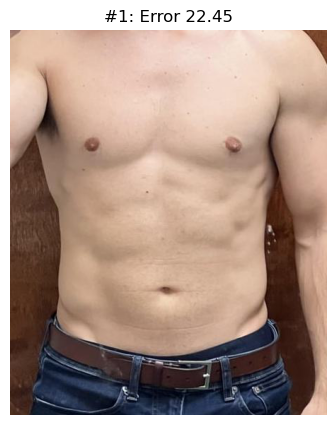

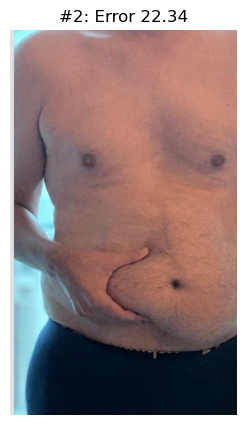

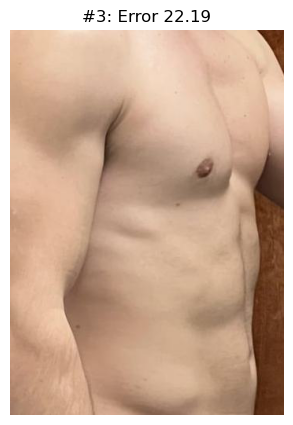

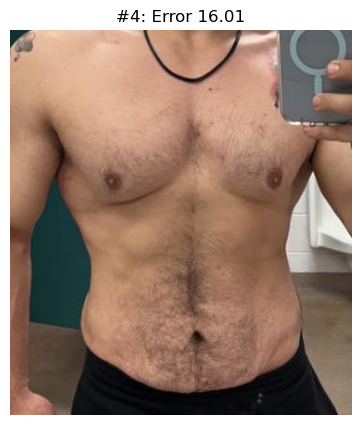

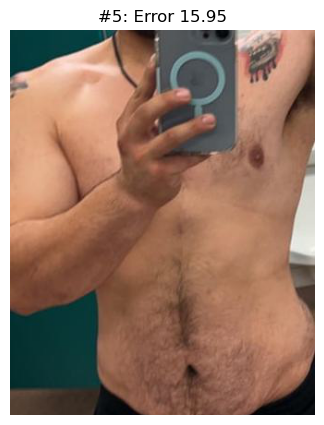

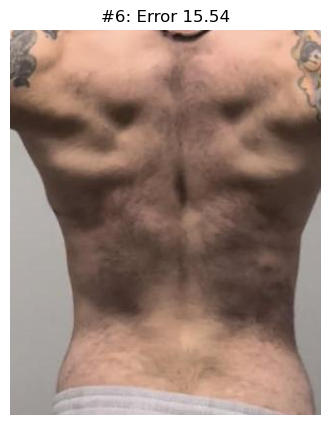

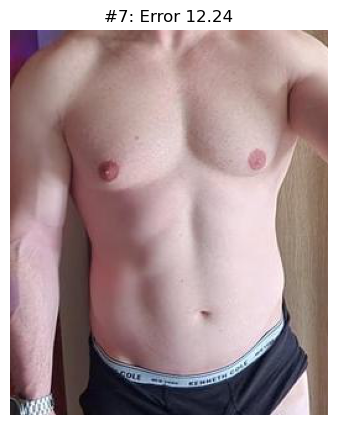

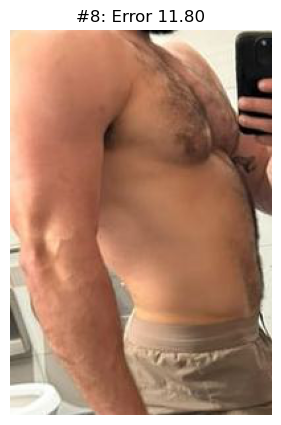

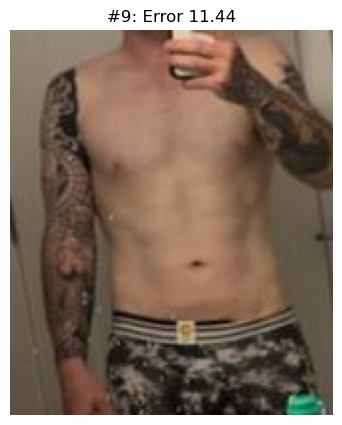

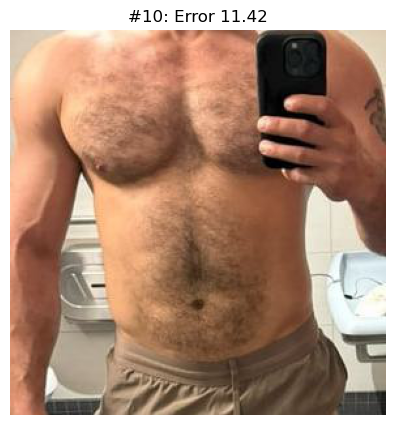

In [23]:
errors = []

pbar = tqdm(df.iterrows(), total=len(df), desc="Processing images", leave=True)

for i, row in pbar:
    try:
        img_path = f"{row['filename']}"  # change if your image path differs
        img = PILImage.create('images/' + img_path)
        bf, _, probs = learn.predict(img)
        pred = float(probs[0])
        actual = float(row['target'])
        error = abs(pred - actual)

        errors.append({
            "img_path": img_path,
            "img": img,
            "actual": actual,
            "pred": pred,
            "error": error
        })

        # Optionally update progress bar postfix
        pbar.set_postfix({"last_error": f"{error:.2f}"})

    except Exception as e:
        pbar.write(f"Skipping {row['filename']} due to error: {e}")
        
# Sort and show top 10 worst predictions
top_errors = sorted(errors, key=lambda x: x['error'], reverse=True)[:10]

for idx, item in enumerate(top_errors):
    print(f"\n#{idx+1}")
    print(f"File: {item['img_path']}")
    print(f"Predicted: {item['pred']:.2f}")
    print(f"Actual: {item['actual']:.2f}")
    print(f"Error: {item['error']:.2f}")
    show_image(item['img'], title=f"#{idx+1}: Error {item['error']:.2f}")


In [ ]:
df_errors = pd.DataFrame(data, columns=headers)

errors.hist(bins=20)

In [ ]:
df['target'].hist(bins=20)